 <h1 align="center" font="bold">New York City Taxi Fare Prediction   </font></h1>
 <h1 align="center" font="bold"> made by : team G3   </font></h1>



![header_image](https://i.imgur.com/D78YdSK.png)

# Introduction : Taxi Fare Prediction



**The objective of New York taxi fare prediction is to develop a model that accurately predicts the fare amount for taxi rides specifically in the context of New York City. The primary goal is to estimate the fare cost based on various input features related to New York taxi trips.**

*  **Data Dictionary**

The dataset contains several columns with information about taxi service.The detailed data dictionary is given below :

* 'User ID': A unique identifier for each user.
* 'User Name': The name of the user.
* 'Driver Name': The name of the taxi driver.
* 'Car Condition': The condition of the taxi car.
* 'Weather': Information about the weather conditions during the trip.
* 'Traffic Condition': Information about the traffic conditions during the trip.
* 'key': A unique identifier for each trip.
* 'fare_amount': The fare amount charged for the trip.
* 'pickup_datetime': The date and time when the trip started.
* 'pickup_longitude': The longitude coordinate of the pickup location.
* 'pickup_latitude': The latitude coordinate of the pickup location.
* 'dropoff_longitude': The longitude coordinate of the dropoff location.
* 'dropoff_latitude': The latitude coordinate of the dropoff location.
* 'passenger_count': The number of passengers in the taxi.
* 'hour': The hour of the day when the trip started.
* 'day': The day of the month when the trip started.
* 'month': The month when the trip started.
* 'weekday': The day of the week when the trip started.
* 'year': The year when the trip started.
* 'jfk_dist': The distance from the pickup location to John F. Kennedy International Airport.
* 'ewr_dist': The distance from the pickup location to Newark Liberty International Airport.
* 'lga_dist': The distance from the pickup location to LaGuardia Airport.
* 'sol_dist': The distance from the pickup location to Statue of Liberty.
* 'nyc_dist': The distance from the pickup location to the center of New York City.
* 'distance': The total distance of the trip.
* 'bearing' :  The direction of travel from the pickup point to the dropoff point.

In [2]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
data = pd.read_csv('final_internship_data.csv')
data

User ID          User Name       Driver Name Car Condition Weather  \
0       KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1       lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2       gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3       9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4       8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
...          ...                ...               ...           ...     ...   
499995  er7Luy6J       Morgan Smith   Gabriel Coleman           Bad   rainy   
499996  FWDZu9NA     Dillon Jackson    Larry Richards     Very Good   rainy   
499997  QZIMcpLZ  Michael Rodriguez    Lonnie Santana           Bad   rainy   
499998  AD72Uwmn       Deborah Soto      Emily Rivera          Good  stormy   
499999  qGKn4Um5         Eric Jones        Julie King     Very Good   sunny   

        Traffic Condition                            key  fare_amount  \
0       Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1            Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2       Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3            Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4       Congested Traffic  2010-03-09 07:51:00.000000135          5.3   
...                   ...                            ...          ...   
499995      Dense Traffic    2015-05-07 18:45:12.0000004          7.0   
499996       Flow Traffic    2010-09-13 12:11:34.0000004         13.7   
499997       Flow Traffic    2014-08-25 00:22:20.0000001         25.0   
499998  Congested Traffic    2015-01-12 12:17:32.0000001          6.5   
499999       Flow Traffic    2010-04-12 23:46:58.0000002          4.9   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0       2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1       2010-01-05 16:52:16         -1.291824  ...      1        1  2010   
2       2011-08-18 00:35:00         -1.291242  ...      8        3  2011   
3       2012-04-21 04:30:42         -1.291319  ...      4        5  2012   
4       2010-03-09 07:51:00         -1.290987  ...      3        1  2010   
...                     ...               ...  ...    ...      ...   ...   
499995  2015-05-07 18:45:12         -1.291173  ...      5        3  2015   
499996  2010-09-13 12:11:34         -1.291595  ...      9        0  2010   
499997  2014-08-25 00:22:20         -1.291262  ...      8        0  2014   
499998  2015-01-12 12:17:32         -1.291101  ...      1        0  2015   
499999  2010-04-12 23:46:58         -1.291312  ...      4        0  2010   

         jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance  \
0       20.265840  55.176046  14.342611  34.543548  27.572573  1.030764   
1       44.667679  31.832358  23.130775  15.125872   8.755732  8.450134   
2       43.597686  33.712082  19.865289  17.722624   9.847344  1.389525   
3       42.642965  32.556289  21.063132  15.738963   7.703421  2.799270   
4       43.329953  39.406828  15.219339  23.732406  15.600745  1.999157   
...           ...        ...        ...        ...        ...       ...   
499995  42.565403  36.580043  17.157511  20.401068  12.280187  1.404709   
499996  41.814877  27.833416  26.463167   8.596656   0.994796  0.994184   
499997  31.780108  38.960930  19.708214  19.066488  11.663395  7.859324   
499998  42.292914  36.382813  17.227166  20.006433  11.819775  0.994470   
499999  38.822968  31.517592  23.087427  11.950577   3.873636  1.040272   

         bearing  
0      -2.918897  
1      -0.375217  
2       2.599961  
3       0.133905  
4      -0.502703  
...          ...  
499995 -2.275706  
499996  2.556931  
499997 -1.926251  
499998 -0.384817  
499999 -2.813690  

[500000 rows x 26 columns]

# Data Exploration

In [4]:
data

User ID          User Name       Driver Name Car Condition Weather  \
0       KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1       lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2       gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3       9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4       8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
...          ...                ...               ...           ...     ...   
499995  er7Luy6J       Morgan Smith   Gabriel Coleman           Bad   rainy   
499996  FWDZu9NA     Dillon Jackson    Larry Richards     Very Good   rainy   
499997  QZIMcpLZ  Michael Rodriguez    Lonnie Santana           Bad   rainy   
499998  AD72Uwmn       Deborah Soto      Emily Rivera          Good  stormy   
499999  qGKn4Um5         Eric Jones        Julie King     Very Good   sunny   

        Traffic Condition                            key  fare_amount  \
0       Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1            Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2       Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3            Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4       Congested Traffic  2010-03-09 07:51:00.000000135          5.3   
...                   ...                            ...          ...   
499995      Dense Traffic    2015-05-07 18:45:12.0000004          7.0   
499996       Flow Traffic    2010-09-13 12:11:34.0000004         13.7   
499997       Flow Traffic    2014-08-25 00:22:20.0000001         25.0   
499998  Congested Traffic    2015-01-12 12:17:32.0000001          6.5   
499999       Flow Traffic    2010-04-12 23:46:58.0000002          4.9   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0       2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1       2010-01-05 16:52:16         -1.291824  ...      1        1  2010   
2       2011-08-18 00:35:00         -1.291242  ...      8        3  2011   
3       2012-04-21 04:30:42         -1.291319  ...      4        5  2012   
4       2010-03-09 07:51:00         -1.290987  ...      3        1  2010   
...                     ...               ...  ...    ...      ...   ...   
499995  2015-05-07 18:45:12         -1.291173  ...      5        3  2015   
499996  2010-09-13 12:11:34         -1.291595  ...      9        0  2010   
499997  2014-08-25 00:22:20         -1.291262  ...      8        0  2014   
499998  2015-01-12 12:17:32         -1.291101  ...      1        0  2015   
499999  2010-04-12 23:46:58         -1.291312  ...      4        0  2010   

         jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance  \
0       20.265840  55.176046  14.342611  34.543548  27.572573  1.030764   
1       44.667679  31.832358  23.130775  15.125872   8.755732  8.450134   
2       43.597686  33.712082  19.865289  17.722624   9.847344  1.389525   
3       42.642965  32.556289  21.063132  15.738963   7.703421  2.799270   
4       43.329953  39.406828  15.219339  23.732406  15.600745  1.999157   
...           ...        ...        ...        ...        ...       ...   
499995  42.565403  36.580043  17.157511  20.401068  12.280187  1.404709   
499996  41.814877  27.833416  26.463167   8.596656   0.994796  0.994184   
499997  31.780108  38.960930  19.708214  19.066488  11.663395  7.859324   
499998  42.292914  36.382813  17.227166  20.006433  11.819775  0.994470   
499999  38.822968  31.517592  23.087427  11.950577   3.873636  1.040272   

         bearing  
0      -2.918897  
1      -0.375217  
2       2.599961  
3       0.133905  
4      -0.502703  
...          ...  
499995 -2.275706  
499996  2.556931  
499997 -1.926251  
499998 -0.384817  
499999 -2.813690  

[500000 rows x 26 columns]

In [5]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [6]:
data.shape

(500000, 26)

In [7]:
data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  500000.000000     500000.000000    500000.000000      499995.000000   
mean       11.358361         -1.265712         0.696740          -1.265755   
std         9.916617          0.206941         0.140909           0.205903   
min       -44.900000        -52.119764       -54.389440         -59.049665   
25%         6.000000         -1.291405         0.710958          -1.291393   
50%         8.500000         -1.291226         0.711268          -1.291197   
75%        12.500000         -1.290970         0.711520          -1.290908   
max       500.000000         37.360538        29.724576           0.712985   

       dropoff_latitude  passenger_count           hour            day  \
count     499995.000000    500000.000000  500000.000000  500000.000000   
mean           0.696675         1.683428      13.510834      15.684206   
std            0.128997         1.307395       6.511571       8.681066   
min          -44.676047         0.000000       0.000000       1.000000   
25%            0.710943         1.000000       9.000000       8.000000   
50%            0.711277         1.000000      14.000000      16.000000   
75%            0.711538         2.000000      19.000000      23.000000   
max            7.061893         6.000000      23.000000      31.000000   

               month        weekday           year       jfk_dist  \
count  500000.000000  500000.000000  500000.000000  499995.000000   
mean        6.268650       3.042008    2011.739132     385.279367   
std         3.437815       1.949240       1.860889    2419.087483   
min         1.000000       0.000000    2009.000000       1.017646   
25%         3.000000       1.000000    2010.000000      41.341514   
50%         6.000000       3.000000    2012.000000      42.523163   
75%         9.000000       5.000000    2013.000000      43.785649   
max        12.000000       6.000000    2015.000000   30133.067880   

            ewr_dist       lga_dist       sol_dist       nyc_dist  \
count  499995.000000  499995.000000  499995.000000  499995.000000   
mean      380.503657     363.843772     363.674038     355.991423   
std      2428.804740    2425.075903    2428.348683    2428.730839   
min         1.460945       0.382119       0.532545       0.080500   
25%        32.173712      17.100762      14.886989       7.147384   
50%        34.787507      19.591554      18.347580      10.458151   
75%        38.304502      22.214815      22.417812      14.448699   
max     30167.595967   30167.285794   30159.407296   30162.285356   

            distance        bearing  
count  499995.000000  499995.000000  
mean       19.468775       0.297145  
std       367.299601       1.804548  
min         0.000000      -3.141593  
25%         1.214550      -0.854721  
50%         2.116970      -0.050442  
75%         3.890070       2.206769  
max     12399.956433       3.141593

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [9]:
# finding no of rows and no of columns in data set
print('number of rows:',data.shape[0])
print('number of columns:',data.shape[1])

number of rows: 500000
number of columns: 26


In [10]:
data.dtypes

User ID               object
User Name             object
Driver Name           object
Car Condition         object
Weather               object
Traffic Condition     object
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object

In [11]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Length: 500000, dtype: bool

In [12]:
for column in data.columns:
    unique_values = data[column].unique()

    print("\033[92m" + f"Unique values in column '{column}':" + "\033[0m")

    print(unique_values)
    print()

Unique values in column 'User ID':
['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5']

Unique values in column 'User Name':
['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson']

Unique values in column 'Driver Name':
['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana']

Unique values in column 'Car Condition':
['Very Good' 'Excellent' 'Bad' 'Good']

Unique values in column 'Weather':
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']

Unique values in column 'Traffic Condition':
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']

Unique values in column 'key':
['2009-06-15 17:26:21.0000001' '2010-01-05 16:52:16.0000002'
 '2011-08-18 00:35:00.00000049' ... '2014-08-25 00:22:20.0000001'
 '2015-01-12 12:17:32.0000001' '2010-04-12 23:46:58.0000002']

Unique values in column 'fare_amount':
[ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ]

Unique values in column 'pickup_datetime

* **Dropping Missing Values**

In [13]:
data.isnull().sum().sort_values(ascending=False)

bearing              5
distance             5
nyc_dist             5
sol_dist             5
lga_dist             5
ewr_dist             5
jfk_dist             5
dropoff_longitude    5
dropoff_latitude     5
hour                 0
year                 0
weekday              0
month                0
day                  0
User ID              0
User Name            0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
Traffic Condition    0
Weather              0
Car Condition        0
Driver Name          0
passenger_count      0
dtype: int64

In [14]:
print('Old size: %d' % len(data))
data= data.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(data))

Old size: 500000
New size: 499995


In [15]:
data.isnull().sum().sort_values(ascending=False)

User ID              0
User Name            0
distance             0
nyc_dist             0
sol_dist             0
lga_dist             0
ewr_dist             0
jfk_dist             0
year                 0
weekday              0
month                0
day                  0
hour                 0
passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
Traffic Condition    0
Weather              0
Car Condition        0
Driver Name          0
bearing              0
dtype: int64

* **Handle Wrong data**

In [16]:
data['fare_amount'].describe()

count    499995.000000
mean         11.358182
std           9.916069
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [17]:
from collections import Counter
Counter(data['fare_amount']<0)

Counter({False: 499974, True: 21})

In [18]:
data = data.drop(data[data['fare_amount']<0].index, axis=0)
data.shape

(499974, 26)

In [19]:
data['fare_amount'].describe()

count    499974.000000
mean         11.358926
std           9.915433
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [20]:
count_zero_passenger = len(data[data['passenger_count'] == 0])
count_zero_passenger

1791

In [21]:
dis=len(data[data['distance'] == 0])
dis

14250

In [22]:
data=data[data['distance'] > 0]

In [23]:
year=len(data[data['year'] == 2009])
year

75039

In [24]:
fare=len(data[data['fare_amount'] == 0])
fare

11

In [25]:
fare=len(data[data['fare_amount']  <3])
fare

2556

In [26]:
data=data[data['fare_amount'] > 3]

In [27]:
# Replace passenger_count with 1 if it is 0
data['passenger_count'] = data['passenger_count'].replace(0, 1)

In [28]:
count_zero_passenger = len(data[data['passenger_count'] == 0])
count_zero_passenger

0

In [29]:
data['passenger_count'].describe()

count    482305.000000
mean          1.688937
std           1.305268
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [30]:
passenger_count = data.groupby('year')['passenger_count'].sum()
passenger_count

year
2009    125690
2010    121684
2011    127421
2012    130335
2013    129855
2014    122453
2015     57145
Name: passenger_count, dtype: int64

**Handle Outliers**

In [31]:
original_data = data.copy()

features = ['fare_amount', 'distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_latitude', 'dropoff_longitude', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']

Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR)))

data[features] = data[features][~outlier_mask]
data = data.dropna().reset_index(drop=True)

print('\n\033[1mInference:\033[0m\nBefore removal of outliers, the dataset had {} samples.'.format(original_data.shape[0]))
print('After removal of outliers, the dataset now has {} samples.'.format(data.shape[0]))
print("-----------------------------")


Inference:
Before removal of outliers, the dataset had 482305 samples.
After removal of outliers, the dataset now has 402345 samples.
-----------------------------


In [32]:
Counter(data['pickup_longitude']>-math.radians(-75))
Counter(data['pickup_longitude']<-math.radians(-72))

Counter({True: 402345})

In [33]:
Counter(data['pickup_latitude']>-math.radians(40))
Counter(data['pickup_latitude']<-math.radians(42))

Counter({False: 402345})

In [34]:
Counter(data['dropoff_latitude']>-math.radians(40))
Counter(data['dropoff_latitude']<-math.radians(42))

Counter({False: 402345})

In [35]:
Counter(data['dropoff_longitude']>-math.radians(-75))
Counter(data['dropoff_longitude']<-math.radians(-72))

Counter({True: 402345})

In [36]:
import math
data = data.loc[data['pickup_latitude'].between(math.radians(40), math.radians(42))]
data = data.loc[data['pickup_longitude'].between(math.radians(-75), math.radians(-72))]
data = data.loc[data['dropoff_latitude'].between(math.radians(40), math.radians(42))]
data = data.loc[data['dropoff_longitude'].between(math.radians(-75), math.radians(-72))]

# Feature Extraction

In [37]:
data['key'] = pd.to_datetime(data['key'])
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [38]:
len(data[data['weekday']!=data['pickup_datetime'].dt.weekday])

0

In [39]:
len(data[data['hour']!=data['pickup_datetime'].dt.hour])

0

In [43]:
len(data[data['month']!=data['pickup_datetime'].dt.month])

0

In [44]:
len(data[data['day']!=data['pickup_datetime'].dt.day])

0

In [47]:
#data.drop(columns=['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist'], inplace=True)

In [49]:
#data.drop(columns='distance', inplace=True)

In [40]:
import math
def haversine_distance(lat1, lon1, lat2, lon2):

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    radius = 6371
    distance = radius * c

    return distance

In [41]:
data['haversine_distance'] = data.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [42]:
# Calculate Euclidean distance
data['euclidean_distance'] = np.sqrt(np.power(data['pickup_latitude'] - data['dropoff_latitude'], 2) +
                                     np.power(data['pickup_longitude'] - data['dropoff_longitude'], 2))


In [43]:
def manhattan(lon1, lat1, lon2, lat2):
    # Manhattan distance formula
    return np.abs(lon1 - lon2) + np.abs(lat1 - lat2)

data['manhattan_distance'] = manhattan(data['pickup_longitude'], data['pickup_latitude'], 
                                       data['dropoff_longitude'], data['dropoff_latitude'])


In [44]:
data.reset_index(drop=True, inplace=True)

In [45]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'haversine_distance',
       'euclidean_distance', 'manhattan_distance'],
      dtype='object')

In [46]:
data.shape

(402345, 29)

In [47]:
data

User ID          User Name       Driver Name Car Condition Weather  \
0       gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
1       9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
2       8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
3       mMC7oPiW       Kayla Martin     Wendy Bennett     Excellent   sunny   
4       A2SNLxxM        James Burch      Casey Cannon     Excellent   windy   
...          ...                ...               ...           ...     ...   
402340  kWwwOifb   William Sullivan       Linda Davis     Very Good   windy   
402341  er7Luy6J       Morgan Smith   Gabriel Coleman           Bad   rainy   
402342  FWDZu9NA     Dillon Jackson    Larry Richards     Very Good   rainy   
402343  AD72Uwmn       Deborah Soto      Emily Rivera          Good  stormy   
402344  qGKn4Um5         Eric Jones        Julie King     Very Good   sunny   

        Traffic Condition                           key  fare_amount  \
0       Congested Traffic 2011-08-18 00:35:00.000000490          5.7   
1            Flow Traffic 2012-04-21 04:30:42.000000100          7.7   
2       Congested Traffic 2010-03-09 07:51:00.000000135          5.3   
3       Congested Traffic 2011-01-06 09:50:45.000000200         12.1   
4            Flow Traffic 2012-11-20 20:35:00.000000100          7.5   
...                   ...                           ...          ...   
402340  Congested Traffic 2015-01-24 22:42:08.000000100         13.0   
402341      Dense Traffic 2015-05-07 18:45:12.000000400          7.0   
402342       Flow Traffic 2010-09-13 12:11:34.000000400         13.7   
402343  Congested Traffic 2015-01-12 12:17:32.000000100          6.5   
402344       Flow Traffic 2010-04-12 23:46:58.000000200          4.9   

           pickup_datetime  pickup_longitude  ...   jfk_dist   ewr_dist  \
0      2011-08-18 00:35:00         -1.291242  ...  43.597686  33.712082   
1      2012-04-21 04:30:42         -1.291319  ...  42.642965  32.556289   
2      2010-03-09 07:51:00         -1.290987  ...  43.329953  39.406828   
3      2011-01-06 09:50:45         -1.291560  ...  42.335622  32.824930   
4      2012-11-20 20:35:00         -1.291195  ...  42.563234  35.482608   
...                    ...               ...  ...        ...        ...   
402340 2015-01-24 22:42:08         -1.291337  ...  42.123722  32.557909   
402341 2015-05-07 18:45:12         -1.291173  ...  42.565403  36.580043   
402342 2010-09-13 12:11:34         -1.291595  ...  41.814877  27.833416   
402343 2015-01-12 12:17:32         -1.291101  ...  42.292914  36.382813   
402344 2010-04-12 23:46:58         -1.291312  ...  38.822968  31.517592   

         lga_dist   sol_dist   nyc_dist  distance   bearing  \
0       19.865289  17.722624   9.847344  1.389525  2.599961   
1       21.063132  15.738963   7.703421  2.799270  0.133905   
2       15.219339  23.732406  15.600745  1.999157 -0.502703   
3       20.648176  15.741133   7.649541  3.787239 -0.674251   
4       18.113693  19.126670  10.993150  1.555807 -0.342260   
...           ...        ...        ...       ...       ...   
402340  20.805410  15.446574   7.285943  1.055295 -3.067213   
402341  17.157511  20.401068  12.280187  1.404709 -2.275706   
402342  26.463167   8.596656   0.994796  0.994184  2.556931   
402343  17.227166  20.006433  11.819775  0.994470 -0.384817   
402344  23.087427  11.950577   3.873636  1.040272 -2.813690   

        haversine_distance  euclidean_distance  manhattan_distance  
0                 1.389525            0.000239            0.000335  
1                 2.799270            0.000442            0.000513  
2                 1.999157            0.000340            0.000475  
3                 3.787239            0.000675            0.000954  
4                 1.555807            0.000254            0.000338  
...                    ...                 ...                 ...  
402340            1.055295            0.000166        

# Data Visualization

In [58]:
df=data
sample_data = df.sample(n=1000, random_state=42)

**Visualizing Pickup locations in NewYork**

In [59]:
import math
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

df = [go.Scattermapbox(
            lat=sample_data['pickup_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample_data['pickup_longitude'].apply(lambda x: math.degrees(x)),
            mode='markers',
            marker=dict(
                size=4,
                color='gold',
                opacity=0.8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox=dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                               bearing=10,
                               pitch=60,
                               zoom=13,
                               center=dict(
                                   lat=40.721319,
                                   lon=-73.987130),
                               style="mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"),
                    width=900,
                    height=600, title="Pick up Locations in New York")

fig = dict(data=df, layout=layout)
offline.iplot(fig)

**Visualizing Dropoff locations in NewYork**

In [60]:
 df = [go.Scattermapbox(
            lat=sample_data['dropoff_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample_data['dropoff_longitude'].apply(lambda x: math.degrees(x)),
            mode='markers',
            marker=dict(
                size= 4,
                color = 'cyan',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=600, title = "Drop off locations in Newyork")
fig = dict(data=df, layout=layout)
offline.iplot(fig)

**High fare locations**

In [61]:
df2=data
sample = df2.sample(n=1000, random_state=42)
high_fares = sample[sample['fare_amount'] > sample.fare_amount.mean() + 3* sample.fare_amount.std()]
high_fares.head()

User ID       User Name       Driver Name Car Condition Weather  \
340032  dD5C0Wgp    David Cooper    Richard Thomas     Very Good   sunny   
300603  Gw94SK6B  Charles Landry  Gregory Hamilton     Excellent  stormy   
116348  hTQdQctL   Carol Goodman    Rebecca Rivera           Bad  stormy   
25194   AM6Wgtw8  Hector Johnson      Javier Lloyd     Excellent   sunny   
241466  QUWUiVPP    Tyler Snyder    Jonathan Baker     Very Good   rainy   

        Traffic Condition                           key  fare_amount  \
340032       Flow Traffic 2015-04-20 18:02:15.000000700         22.0   
300603      Dense Traffic 2013-08-12 09:29:51.000000100         21.0   
116348  Congested Traffic 2015-01-13 04:12:12.000000200         20.0   
25194   Congested Traffic 2014-10-13 08:11:00.000000300         21.0   
241466  Congested Traffic 2014-04-01 01:24:57.000000200         21.5   

           pickup_datetime  pickup_longitude  ...  dropoff_longitude  \
340032 2015-04-20 18:02:15         -1.291066  ...          -1.291802   
300603 2013-08-12 09:29:51         -1.291164  ...          -1.291159   
116348 2015-01-13 04:12:12         -1.291266  ...          -1.291384   
25194  2014-10-13 08:11:00         -1.291786  ...          -1.291065   
241466 2014-04-01 01:24:57         -1.291333  ...          -1.290384   

        dropoff_latitude  passenger_count  hour  day  month  weekday  year  \
340032          0.710663                2    18   20      4        0  2015   
300603          0.710792                1     9   12      8        0  2013   
116348          0.711327                1     4   13      1        1  2015   
25194           0.711353                3     8   13     10        0  2014   
241466          0.711064                2     1    1      4        1  2014   

         bearing  distance  
340032  2.406615  5.298709  
300603 -3.133333  2.989244  
116348  0.718850  0.860707  
25194  -0.627680  5.926243  
241466 -1.768631  4.670359  

[5 rows x 21 columns]

In [62]:
df2 = [go.Scattermapbox(
            lat=sample['pickup_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample['pickup_longitude'].apply(lambda x: math.degrees(x)),
            customdata = high_fares['key'],
            mode='markers',
            marker=dict(
                size= 8,
                color = 'violet',
                opacity = .8),
            name ='high_fares_pick_up'
          ),
        go.Scattermapbox(
            lat=sample['dropoff_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample['dropoff_longitude'].apply(lambda x: math.degrees(x)),
            customdata = high_fares['key'],
            mode='markers',
            marker=dict(
                size= 8,
                color = 'gold',
                opacity = .8),
            name ='high_fares_drop_off'
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=600, title = "High Fare Locations")
fig = dict(data=df2, layout=layout)
offline.iplot(fig)

In [63]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [64]:
import folium

%matplotlib inline
plt.style.use('Solarize_Light2')

In [65]:
train=data
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

pickups = []
dropoffs = []
for index, row in train.iterrows():
    pickup = [math.degrees(row["pickup_latitude"]), math.degrees(row["pickup_longitude"])]
    dropoff = [math.degrees(row["dropoff_latitude"]), math.degrees(row["dropoff_longitude"])]
    pickups.append(pickup)
    dropoffs.append(dropoff)

# Plotting pickups and dropoffs
for index, (pickup, dropoff) in enumerate(zip(pickups[:10], dropoffs[:10])):
    folium.Marker(
        location=pickup,
        popup="Pickup",
        icon=folium.Icon(color="blue"),
    ).add_to(map_nyc)
    folium.Marker(
        location=dropoff,
        popup="Dropoff",
        icon=folium.Icon(color="red"),
    ).add_to(map_nyc)

map_nyc

> * **Visualising the data**

In [66]:
df4=data

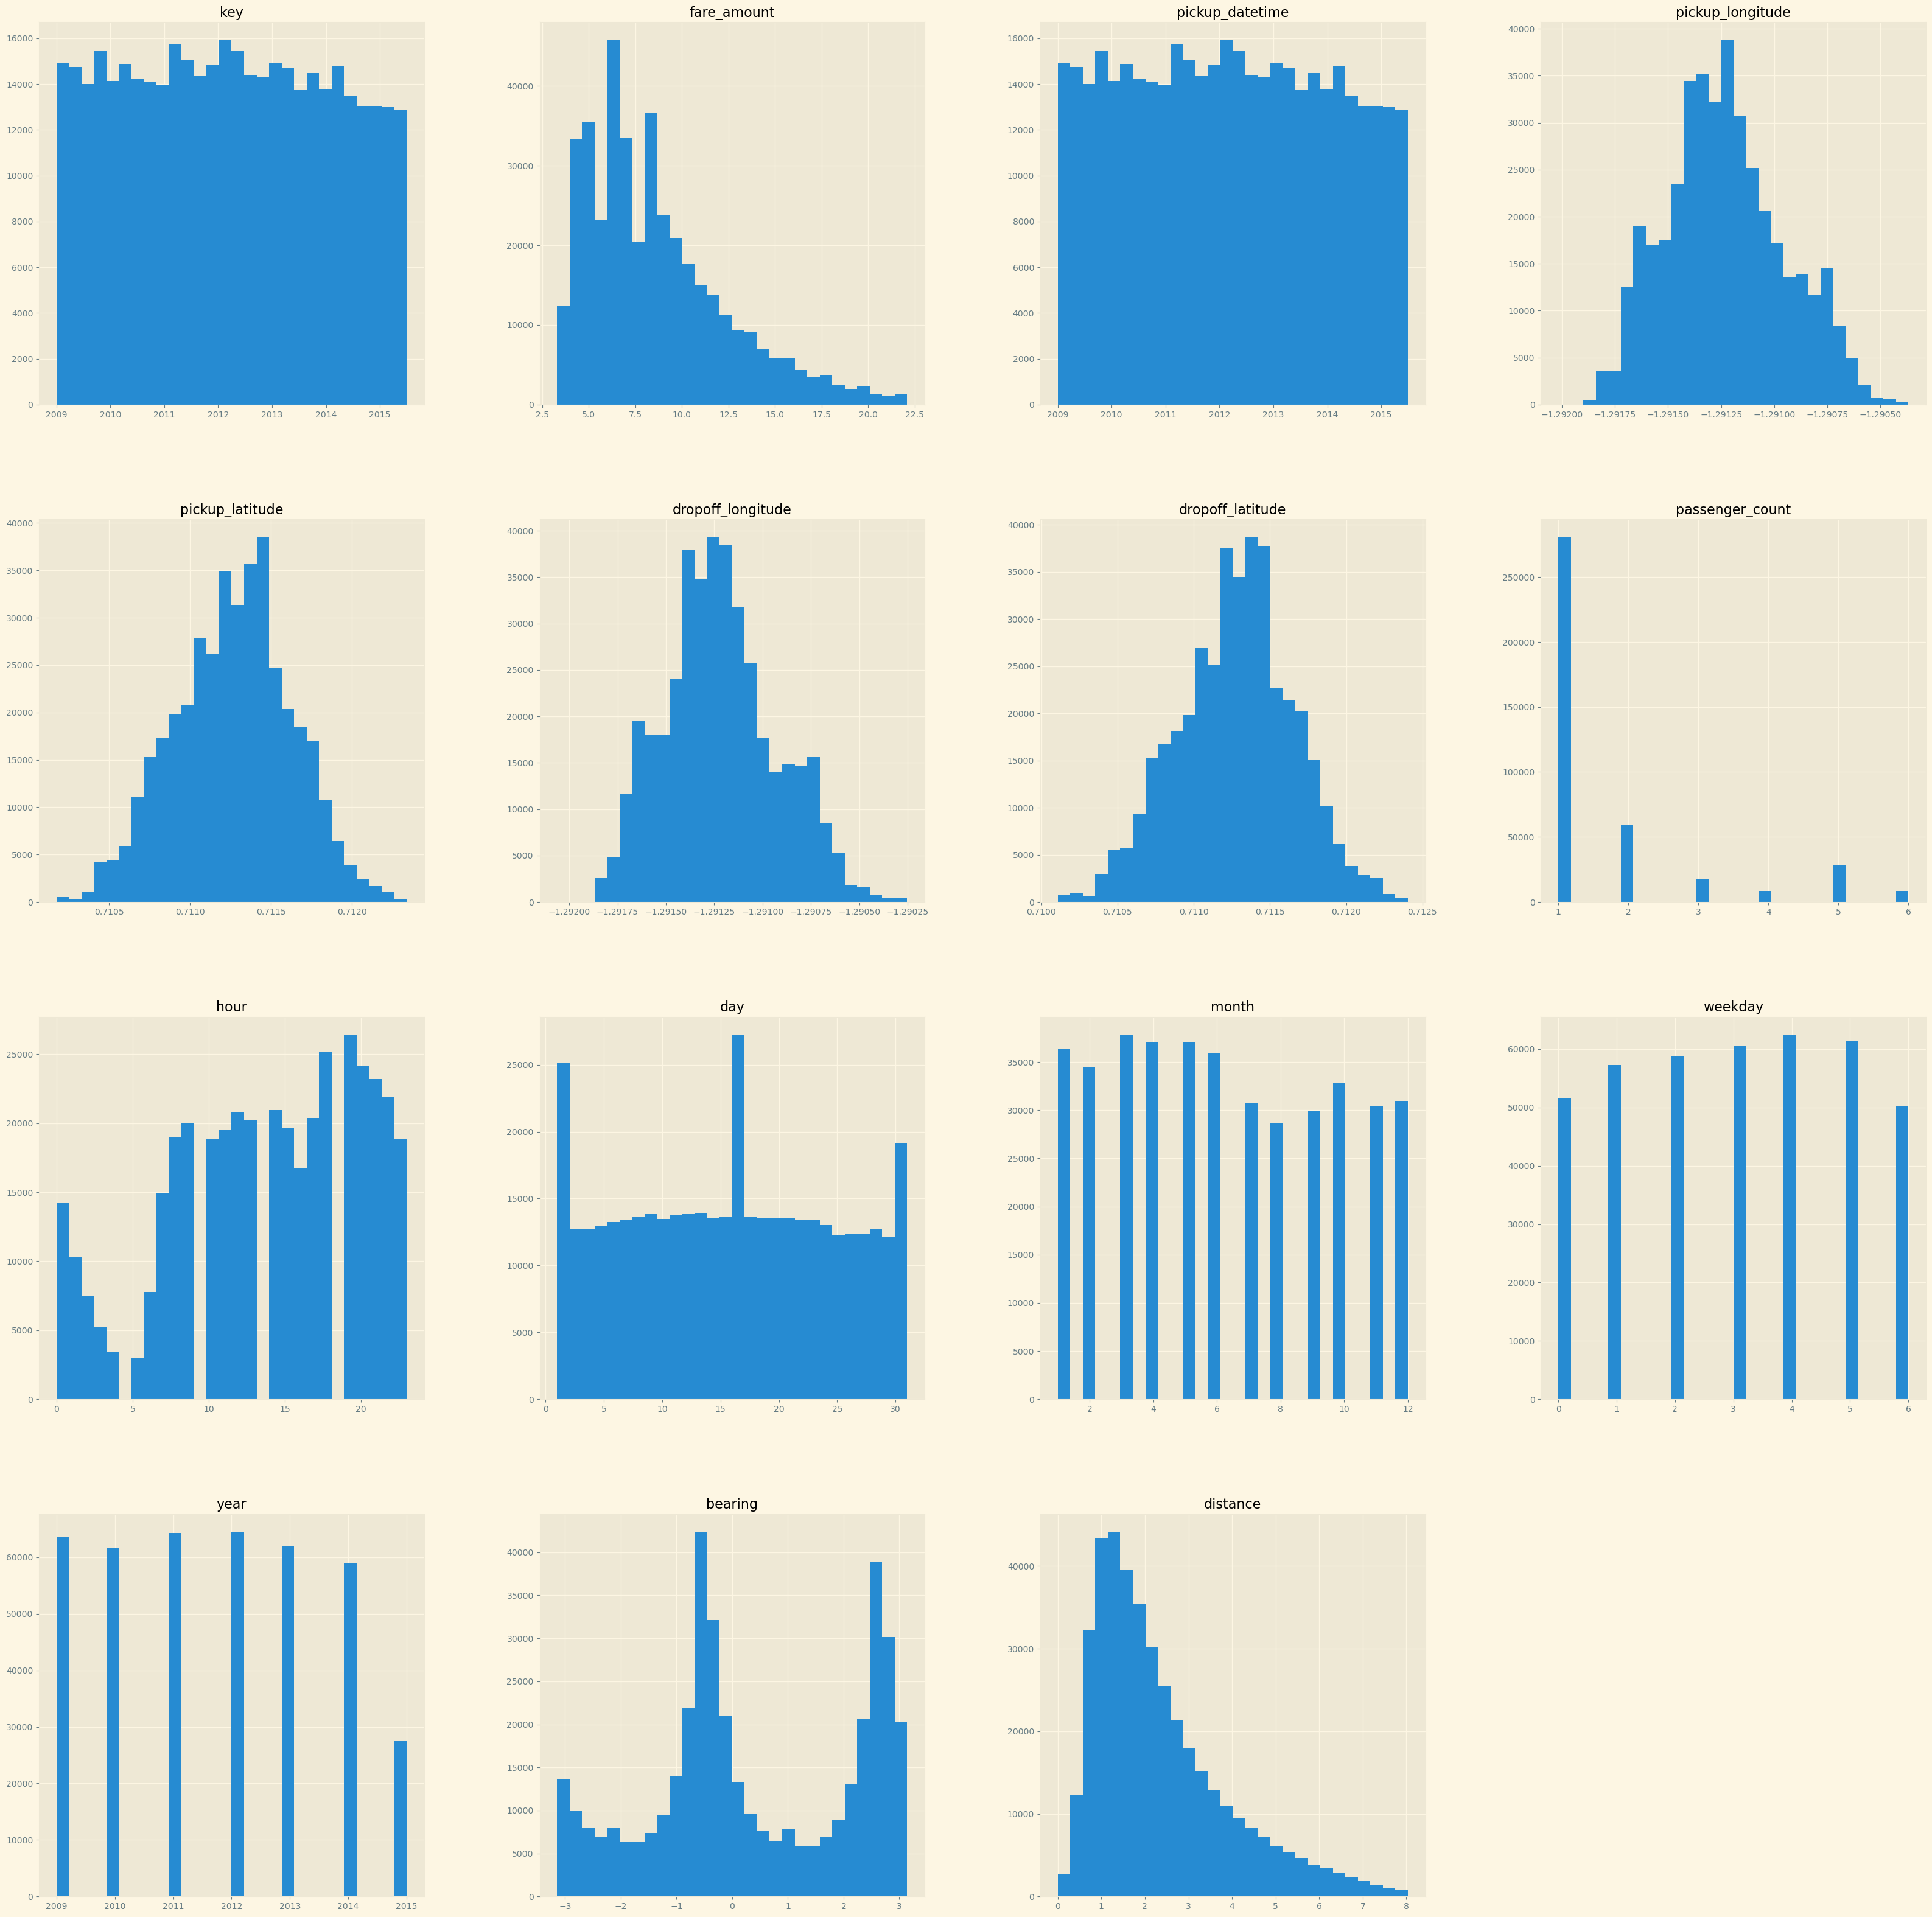

In [67]:
df4.hist(figsize=(40,40), bins=28);

<Axes: xlabel='fare_amount', ylabel='Count'>

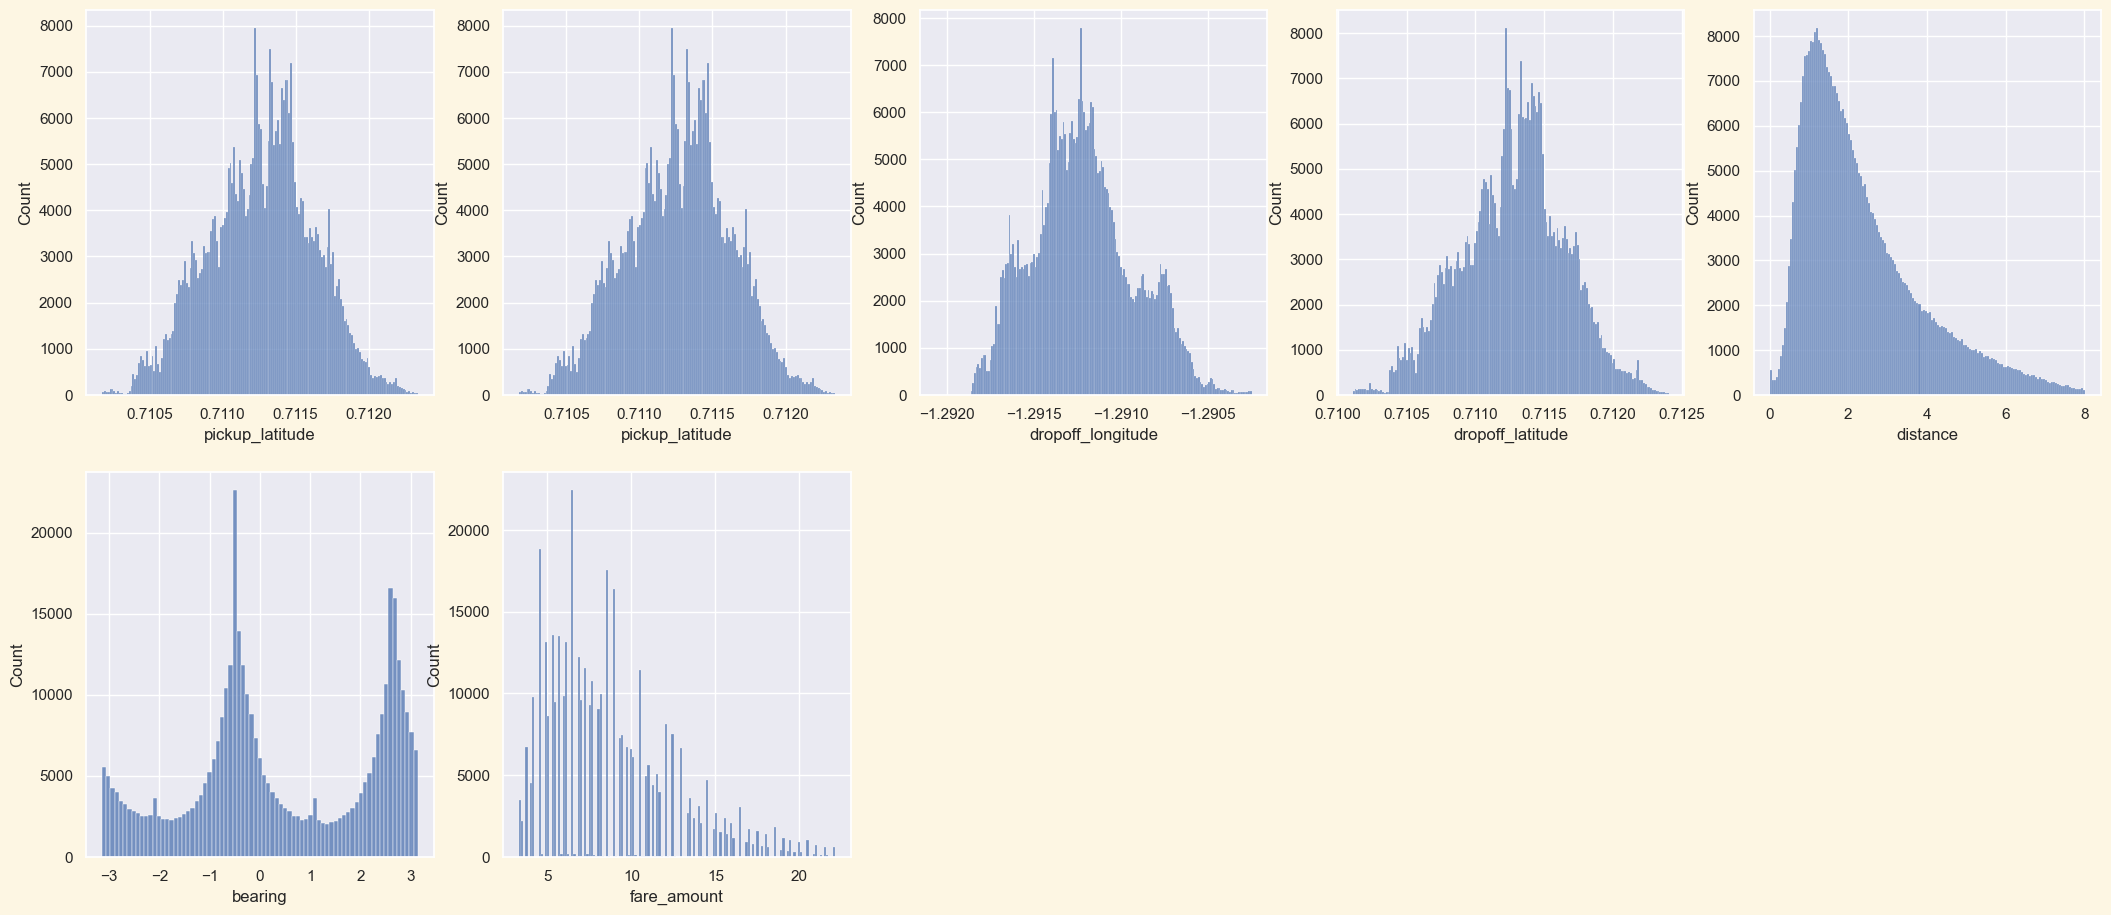

In [68]:
plt.figure(figsize = (26,17))
sns.set(color_codes = True)

plt.subplot(3,5,1)
sns.histplot(df4['pickup_latitude'], kde = False)

plt.subplot(3,5,2)
sns.histplot(df4['pickup_latitude'], kde = False)

plt.subplot(3,5,3)
sns.histplot(df4['dropoff_longitude'], kde = False)

plt.subplot(3,5,4)
sns.histplot(df4['dropoff_latitude'], kde = False)

plt.subplot(3,5,5)
sns.histplot(df4['distance'], kde = False)

plt.subplot(3,5,6)
sns.histplot(df4['bearing'], kde = False)

plt.subplot(3,5,7)
sns.histplot(df4['fare_amount'], kde = False)

**Categorical Variables**

> * **count values in columns**

<Axes: title={'center': 'Variable weekday'}, xlabel='weekday', ylabel='count'>

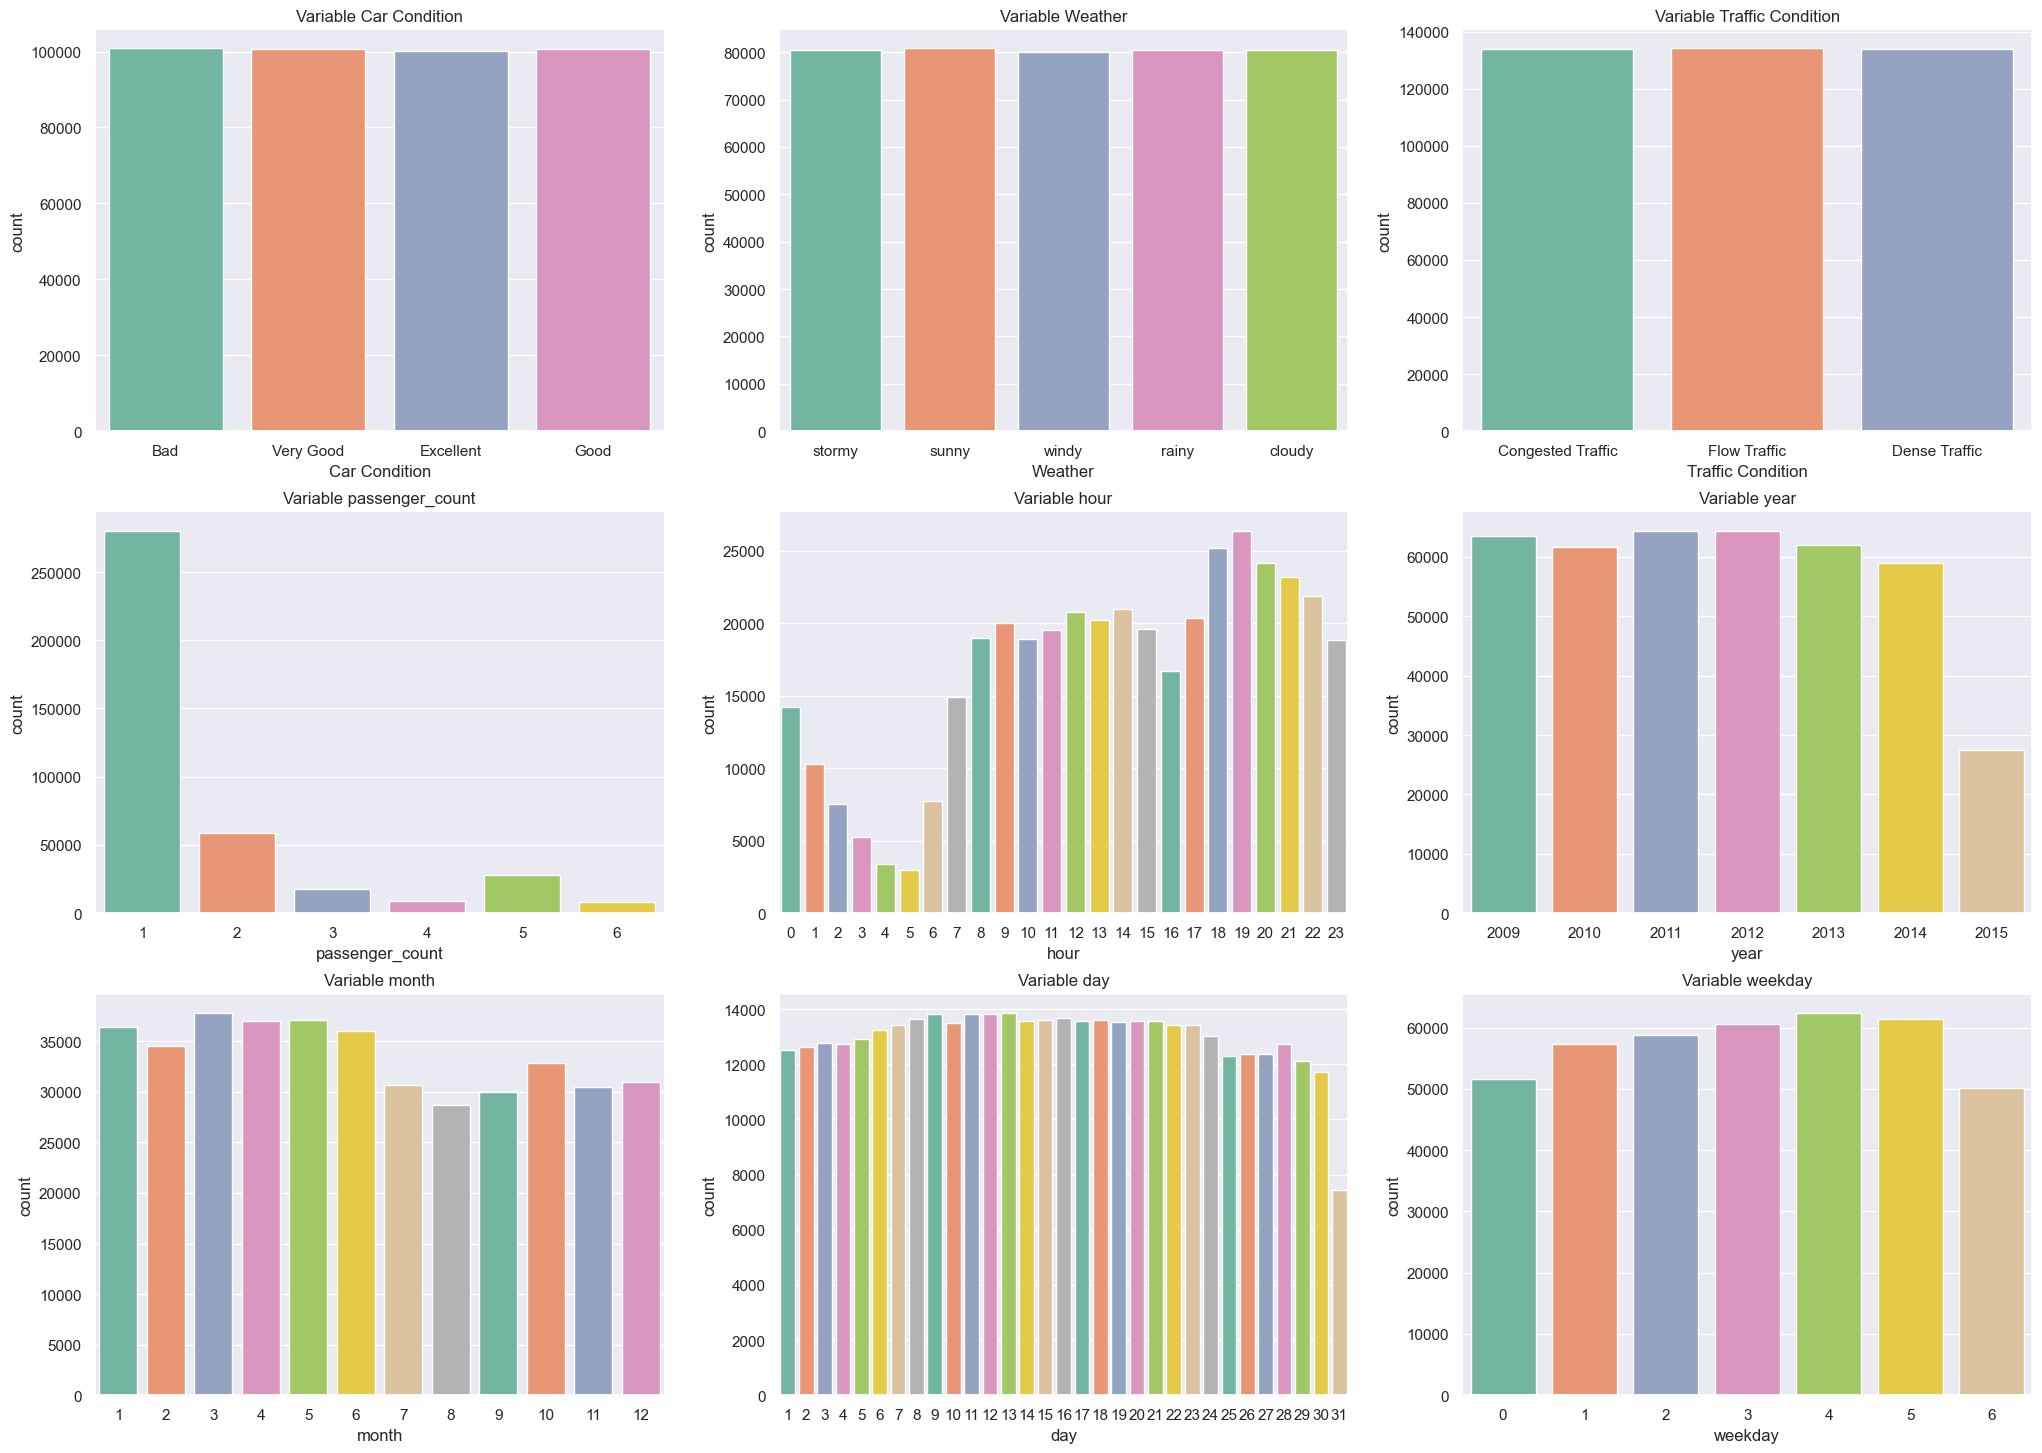

In [69]:
plt.figure(figsize = (25,24))

plt.subplot(4,3,1)
plt.gca().set_title('Variable Car Condition')
sns.countplot(x ='Car Condition', palette = 'Set2', data = df4)

plt.subplot(4,3,2)
plt.gca().set_title('Variable Weather')
sns.countplot(x = 'Weather', palette = 'Set2', data = df4)

plt.subplot(4,3,3)
plt.gca().set_title('Variable Traffic Condition')
sns.countplot(x = 'Traffic Condition', palette = 'Set2', data = df4)

plt.subplot(4,3,4)
plt.gca().set_title('Variable passenger_count')
sns.countplot(x = 'passenger_count', palette = 'Set2', data = df4)

plt.subplot(4,3,5)
plt.gca().set_title('Variable hour')
sns.countplot(x = 'hour', palette = 'Set2', data = df4)

plt.subplot(4,3,6)
plt.gca().set_title('Variable year')
sns.countplot(x = 'year', palette = 'Set2', data = df4)

plt.subplot(4,3,7)
plt.gca().set_title('Variable month')
sns.countplot(x = 'month', palette = 'Set2', data = df4)

plt.subplot(4,3,8)
plt.gca().set_title('Variable day')
sns.countplot(x = 'day', palette = 'Set2', data = df4)

plt.subplot(4,3,9)
plt.gca().set_title('Variable weekday')
sns.countplot(x = 'weekday', palette = 'Set2', data = df4)


<Axes: title={'center': 'Variable weekday'}, xlabel='weekday', ylabel='fare_amount'>

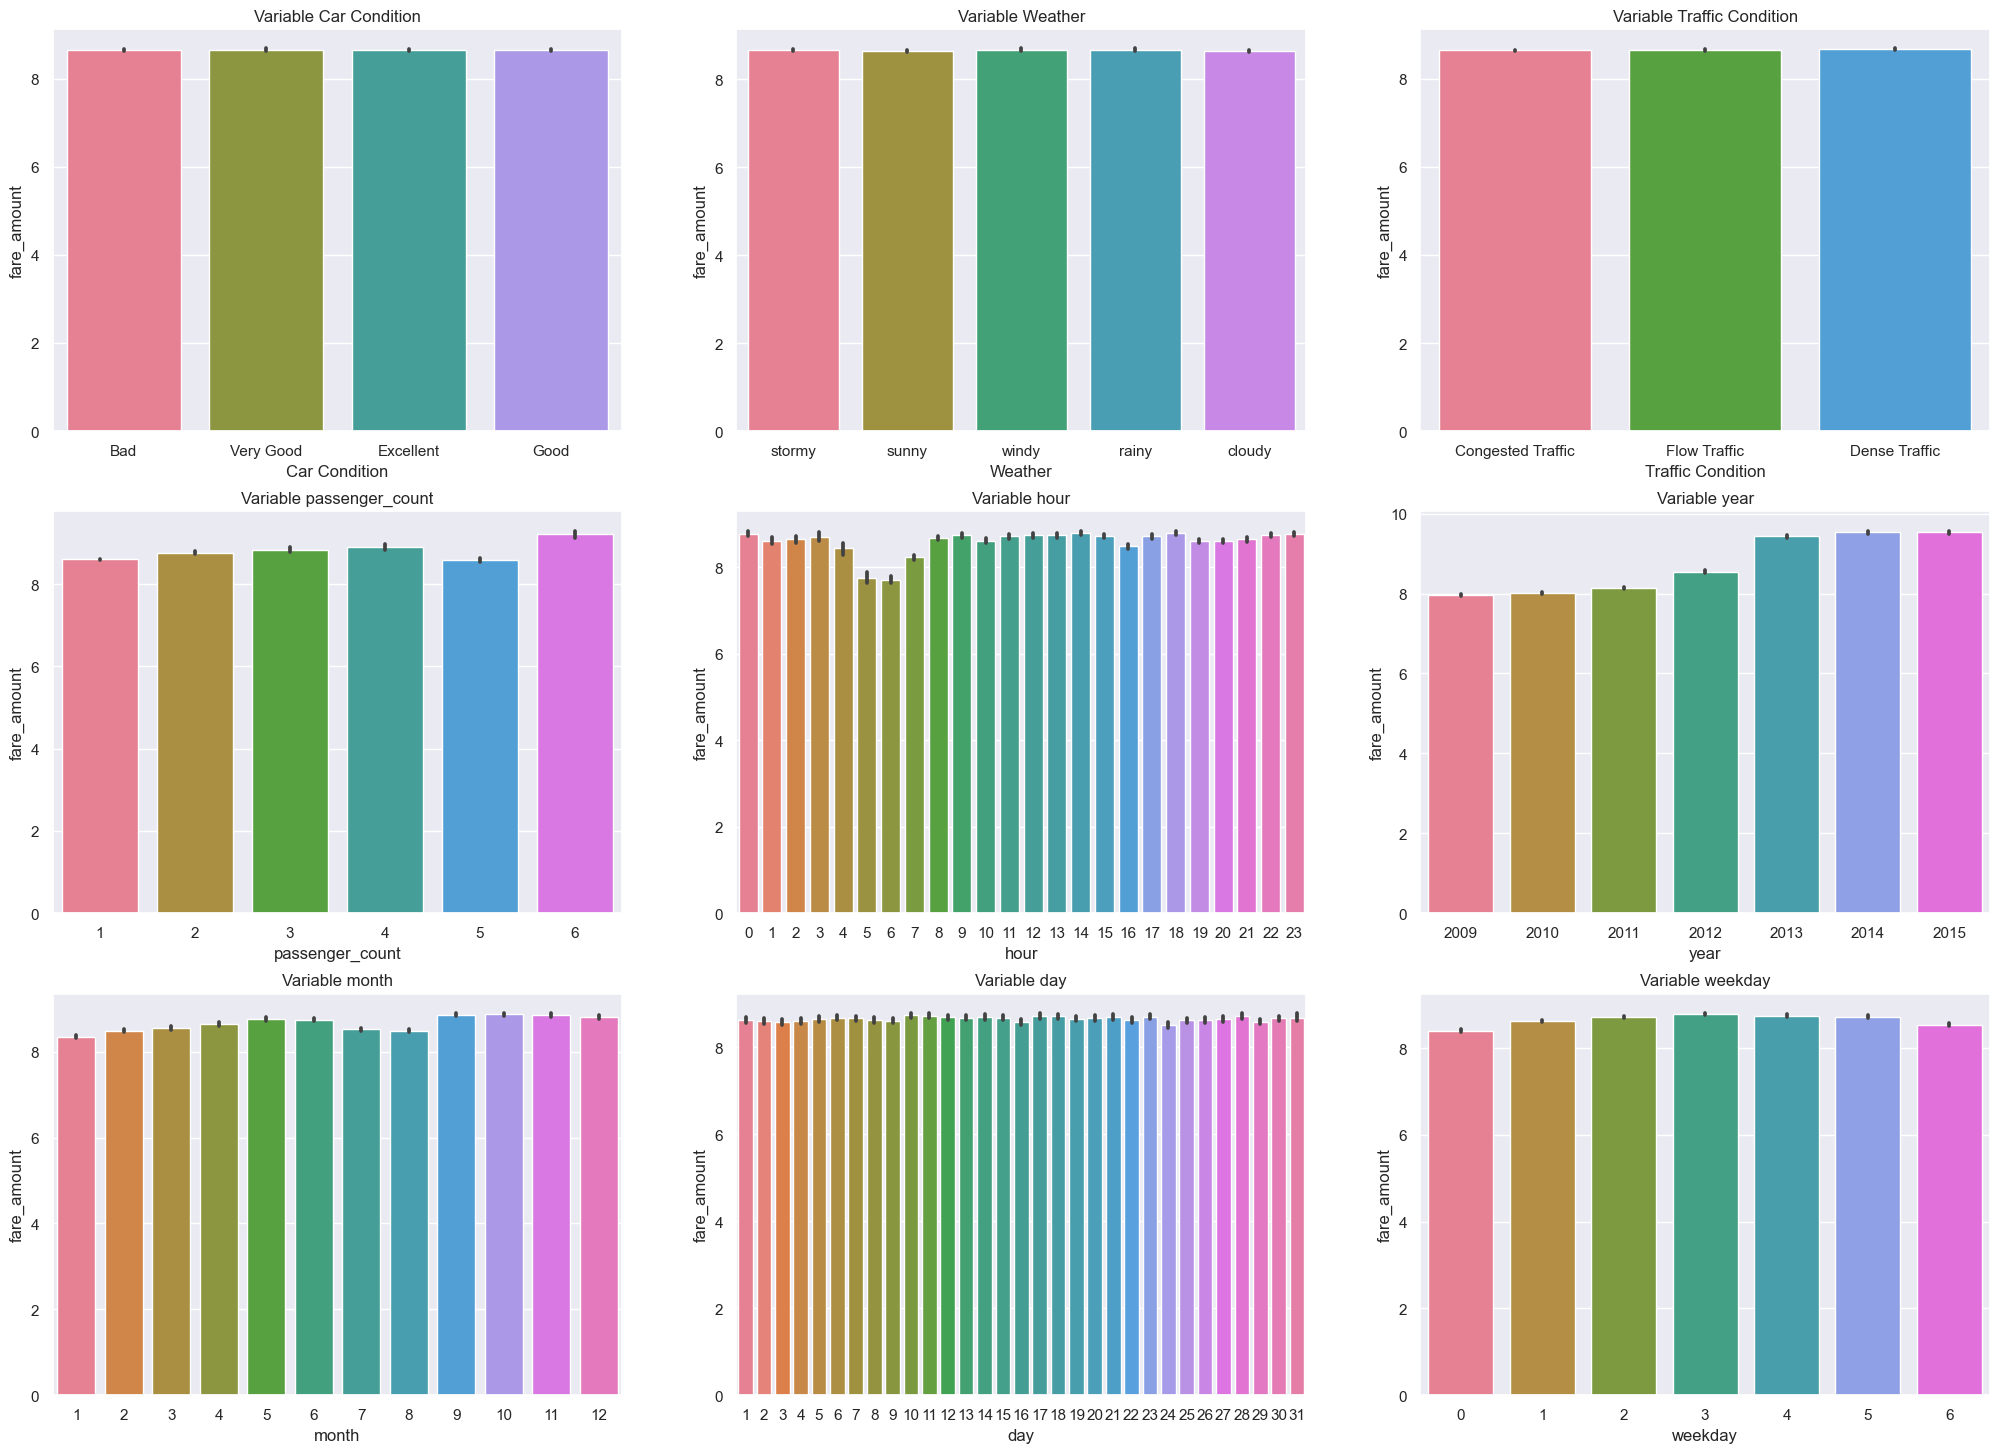

In [70]:
plt.figure(figsize = (25,24))

plt.subplot(4,3,1)
plt.gca().set_title('Variable Car Condition')
sns.barplot(x ='Car Condition',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,2)
plt.gca().set_title('Variable Weather')
sns.barplot(x = 'Weather',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,3)
plt.gca().set_title('Variable Traffic Condition')
sns.barplot(x = 'Traffic Condition',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,4)
plt.gca().set_title('Variable passenger_count')
sns.barplot(x = 'passenger_count',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,5)
plt.gca().set_title('Variable hour')
sns.barplot(x = 'hour',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,6)
plt.gca().set_title('Variable year')
sns.barplot(x = 'year',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,7)
plt.gca().set_title('Variable month')
sns.barplot(x = 'month',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,8)
plt.gca().set_title('Variable day')
sns.barplot(x = 'day',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,9)
plt.gca().set_title('Variable weekday')
sns.barplot(x = 'weekday',y='fare_amount', palette = 'husl', data = df4)

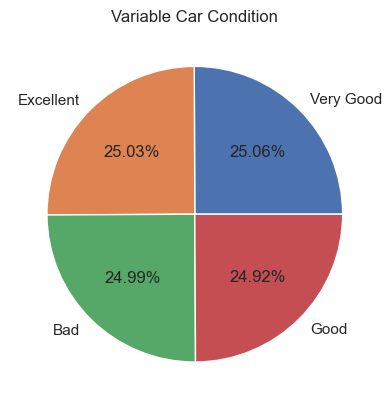

In [71]:
plt.gca().set_title('Variable Car Condition')
label= ['Very Good','Excellent','Bad','Good']
plt.pie(df4["Car Condition"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

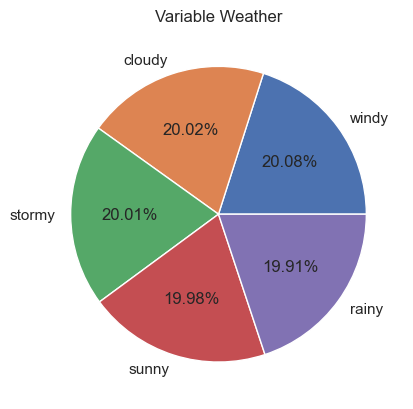

In [72]:
plt.gca().set_title('Variable Weather')
label= [ "windy","cloudy","stormy",'sunny', 'rainy',]
plt.pie(df4["Weather"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

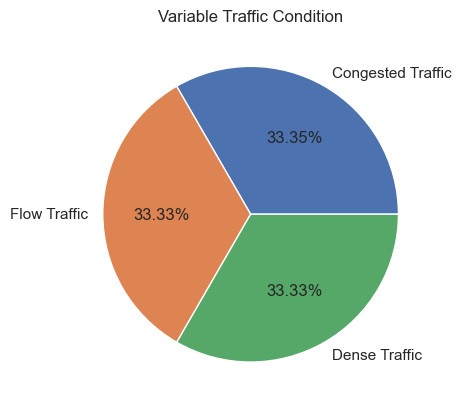

In [73]:
plt.gca().set_title('Variable Traffic Condition')
label= ['Congested Traffic', 'Flow Traffic', 'Dense Traffic']
plt.pie(df4["Traffic Condition"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

**Continous Variables**

* **Outliers Visualization**

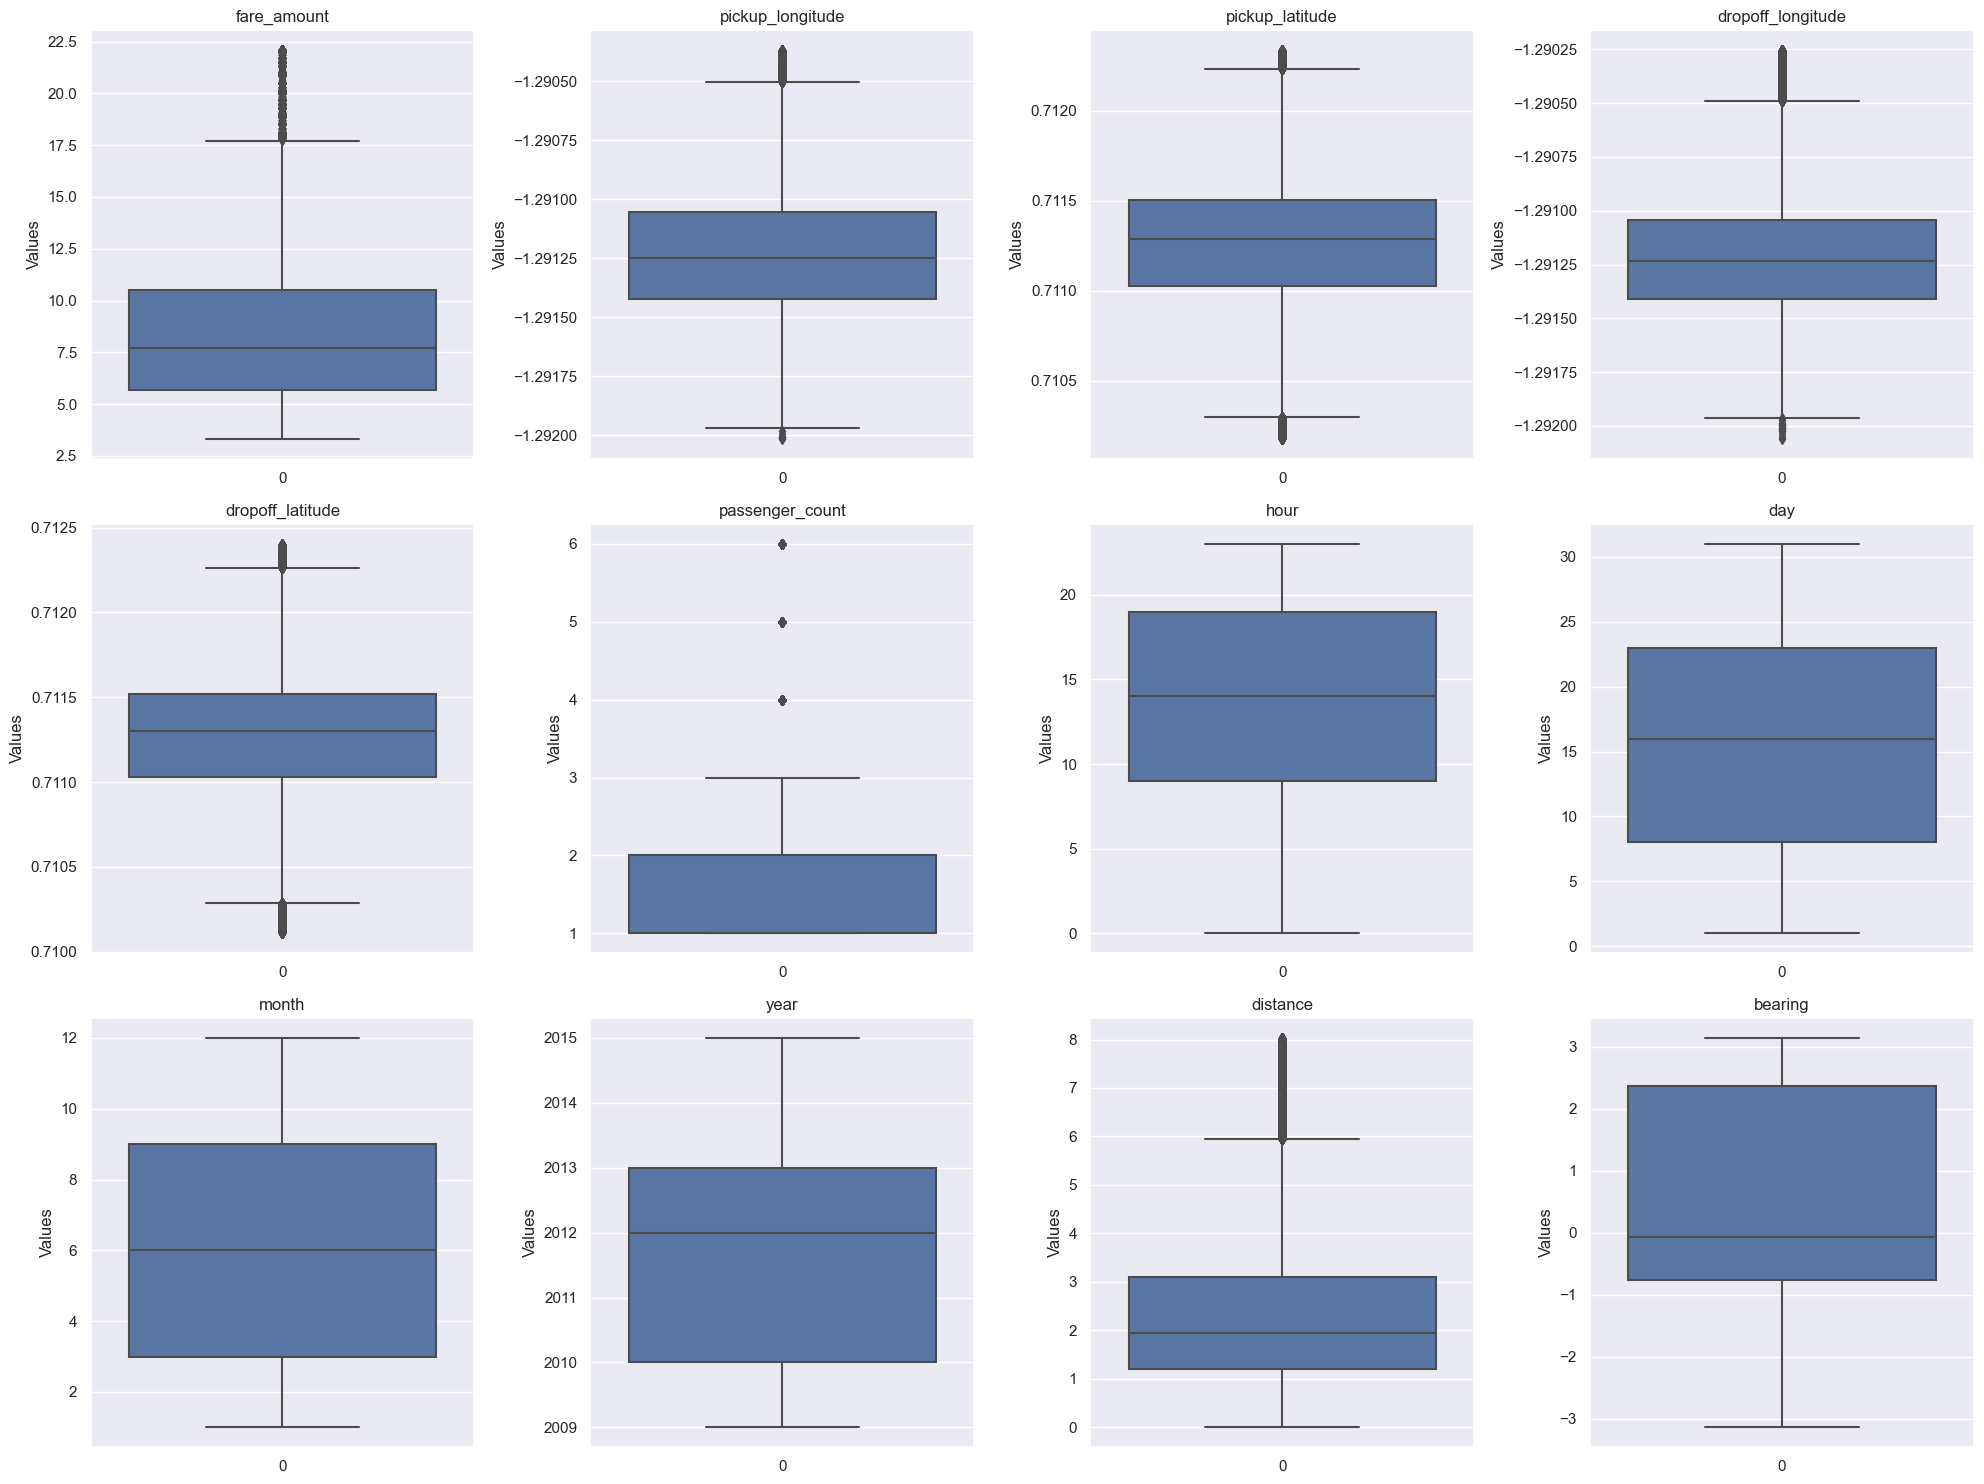

In [75]:
# Define the columns to plot
columns = [ 'fare_amount',
           'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
           'hour', 'day', 'month', 'year',
           'distance', 'bearing']

# Set up the subplot grid
num_rows = 3  # Number of rows in the grid
num_cols = 4  # Number of columns in the grid

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each column in a separate subplot
for i, column in enumerate(columns):
    ax = axes[i]  # Select the current subplot
    sns.boxplot(df4[column], ax=ax)
    ax.set_title(column)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove the x-axis label for better readability
    ax.set_ylabel('Values')  # Set the y-axis label

# Remove any extra subplots if the number of columns is not a multiple of the grid size
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

**Plot Heatmap of Pickups and Dropoffs within NYC**

(-1.292067, -1.28718)

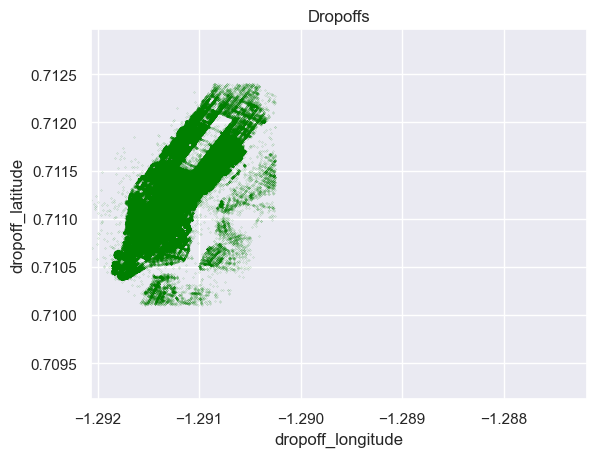

In [76]:
city_long_border = (-1.292067, -1.28718 )
city_lat_border = ( 0.709127,  0.712967 )

df4.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green',
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-1.292067, -1.28718)

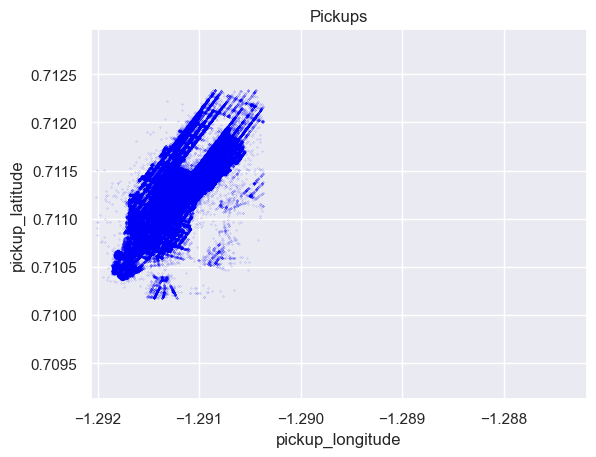

In [77]:
df4.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue',
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [78]:
# Let's group mean fare_amount by pickup_year to see if there is a pattern.
pivot_year = pd.pivot_table(df4, values = 'fare_amount', index = 'year', aggfunc = ['mean'])
print('Mean fare_amount across the classes of pickup_year: \n{}'.format(pivot_year))

Mean fare_amount across the classes of pickup_year: 
            mean
     fare_amount
year            
2009    7.962361
2010    8.016444
2011    8.135983
2012    8.551428
2013    9.431999
2014    9.535954
2015    9.529407


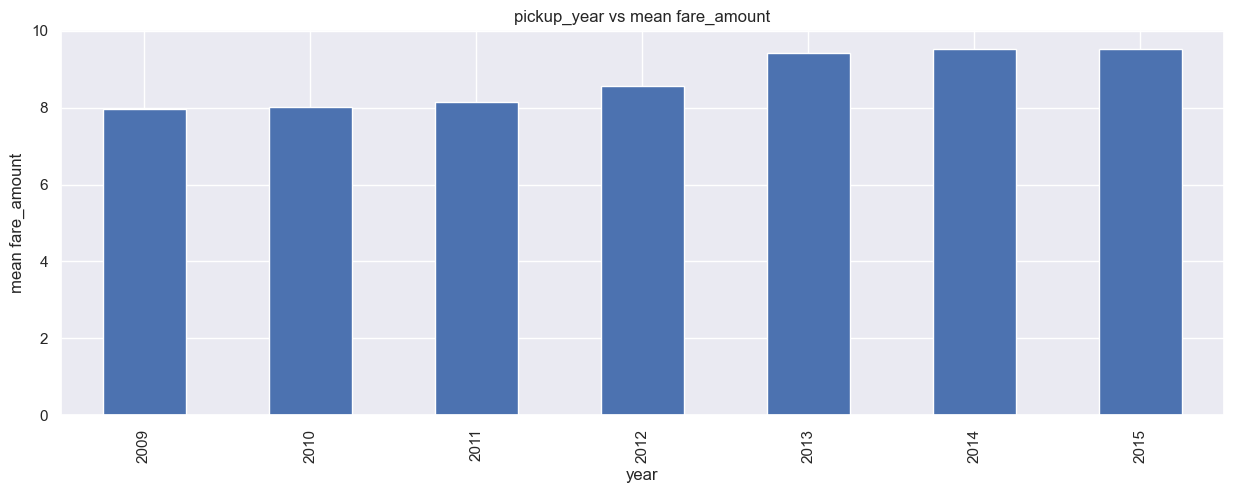

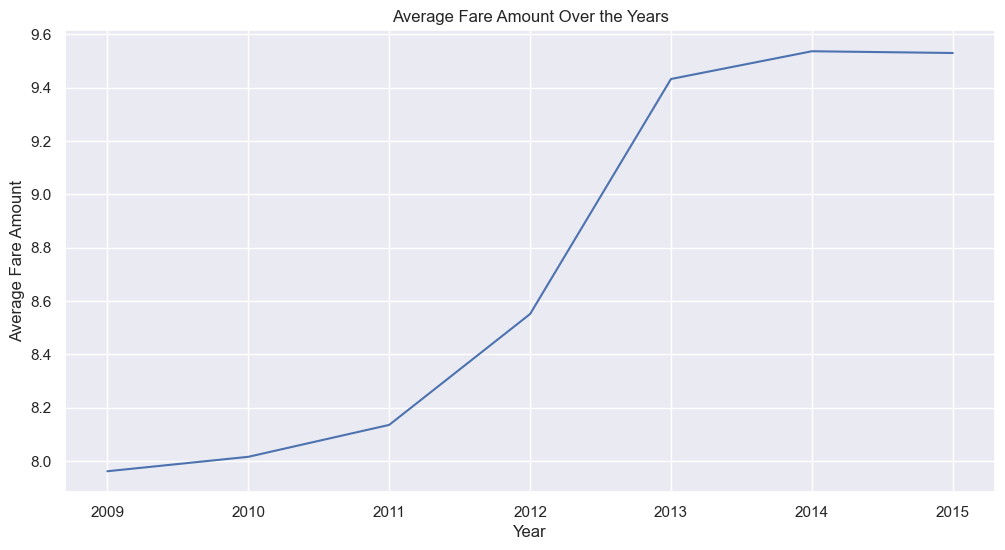

In [79]:
fig, ax = plt.subplots(figsize = (15,5))
pivot_year.plot(kind = 'bar', legend = False, ax = ax)
ax.set(title = 'pickup_year vs mean fare_amount', ylabel= 'mean fare_amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='fare_amount', data=df4, estimator='mean', ci=None)
plt.title("Average Fare Amount Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Fare Amount")
plt.show()

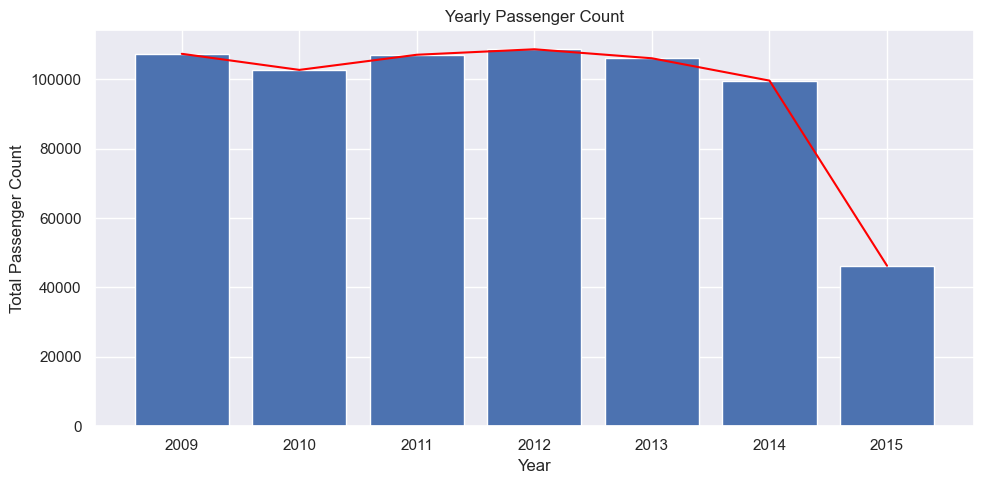

In [80]:
yearly_count = df4.groupby('year')['passenger_count'].sum()
plt.figure(figsize=(10, 5))
plt.bar(yearly_count.index, yearly_count.values, label='Bar Plot')
plt.plot(yearly_count.index, yearly_count.values, linestyle='-' , color='red')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.title('Yearly Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()

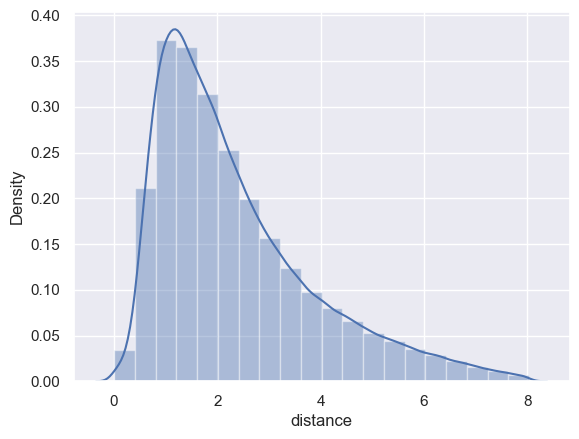

In [83]:
import seaborn as sb
sb.distplot(df4['distance'], bins=20)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df4, x='fare_amount', hue='passenger_count', kde=True)
plt.title("Fare Amount Distribution by Passenger Count")
plt.xlabel("Fare Amount")
plt.ylabel("Density")
plt.legend(title="Passenger Count")
plt.xlim(0, 35)
plt.show()

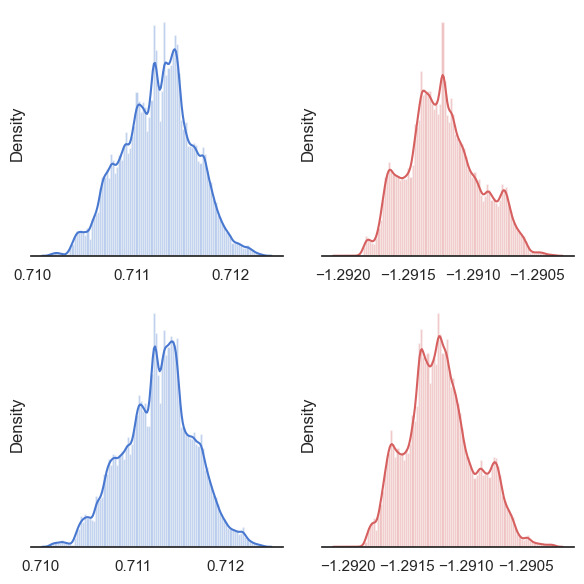

In [85]:
df_data_new = df4.copy()
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(6, 6), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sb.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sb.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# Label Encoding

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Car Condition']= label_encoder.fit_transform(data['Car Condition'])
label_encoder = preprocessing.LabelEncoder()
data['Weather']= label_encoder.fit_transform(data['Weather'])
label_encoder = preprocessing.LabelEncoder()
data['Traffic Condition']= label_encoder.fit_transform(data['Traffic Condition'])

# Feature Engineering

# Feature Selection

In [49]:
data.drop(['key', 'pickup_datetime','User ID','User Name','Driver Name'], axis = 1, inplace = True)

> * **Plot Correlation Coefficient**

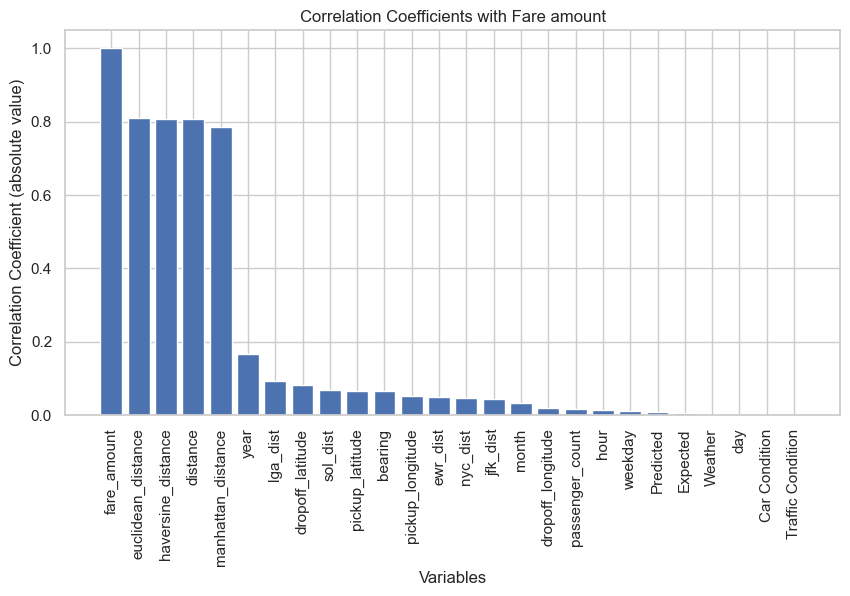

In [82]:
cor = data.corr()
target = abs(cor['fare_amount'])

# Sort the correlation coefficients in descending order
sorted_target = target.sort_values(ascending=False)

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(sorted_target.index, sorted_target.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.title('Correlation Coefficients with Fare amount')
plt.savefig('correlation.png')
plt.show()

In [51]:
data[data.columns[1:]].corr()['fare_amount'][:]

Weather               0.001106
Traffic Condition     0.000334
fare_amount           1.000000
pickup_longitude     -0.050959
pickup_latitude      -0.066424
dropoff_longitude    -0.018734
dropoff_latitude     -0.082402
passenger_count       0.017601
hour                  0.013595
day                   0.000845
month                 0.034043
weekday               0.012132
year                  0.165226
jfk_dist             -0.044272
ewr_dist             -0.049074
lga_dist              0.091511
sol_dist             -0.067403
nyc_dist             -0.046108
distance              0.806915
bearing               0.064685
haversine_distance    0.806915
euclidean_distance    0.810729
manhattan_distance    0.785548
Name: fare_amount, dtype: float64

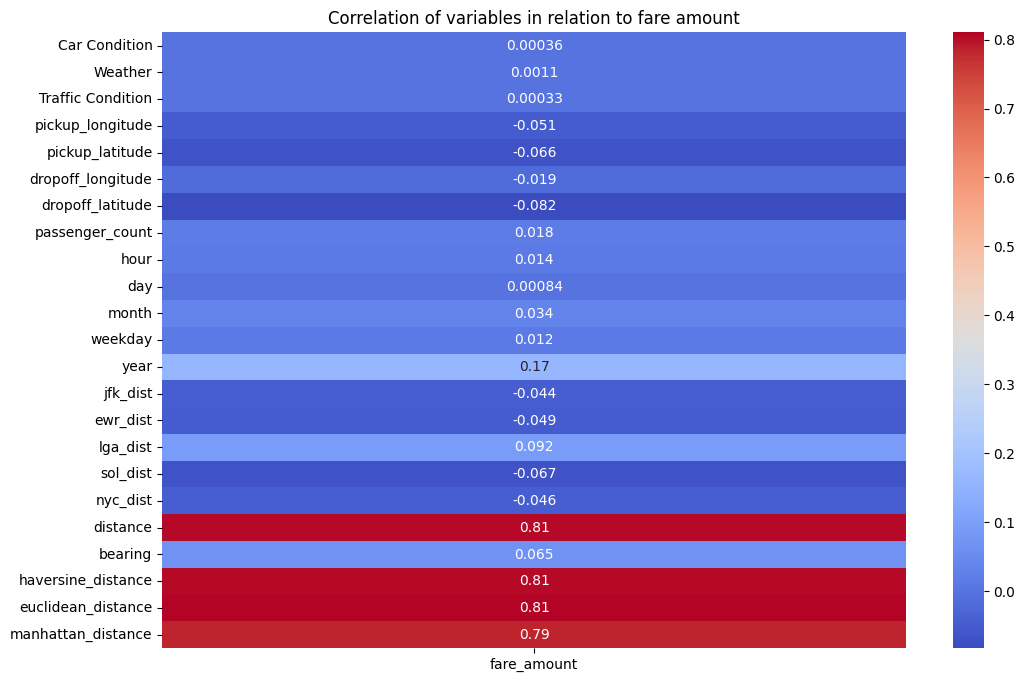

In [52]:
corr_matrix = data.corr()["fare_amount"]
corr_matrix = corr_matrix.drop("fare_amount", axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.to_frame(), cmap="coolwarm", annot=True)
plt.title("Correlation of variables in relation to fare amount")
plt.show()

In [93]:
data.shape

(402345, 16)

In [53]:
df5=data.copy()

In [54]:
cor = df5.corr()
target = abs(cor['fare_amount'])
features = list(target[target >= 0.01].index)
for c in df5.columns:
    if c != 'fare_amount' and c not in features:
        df5.drop(columns=c, axis=1, inplace=True)

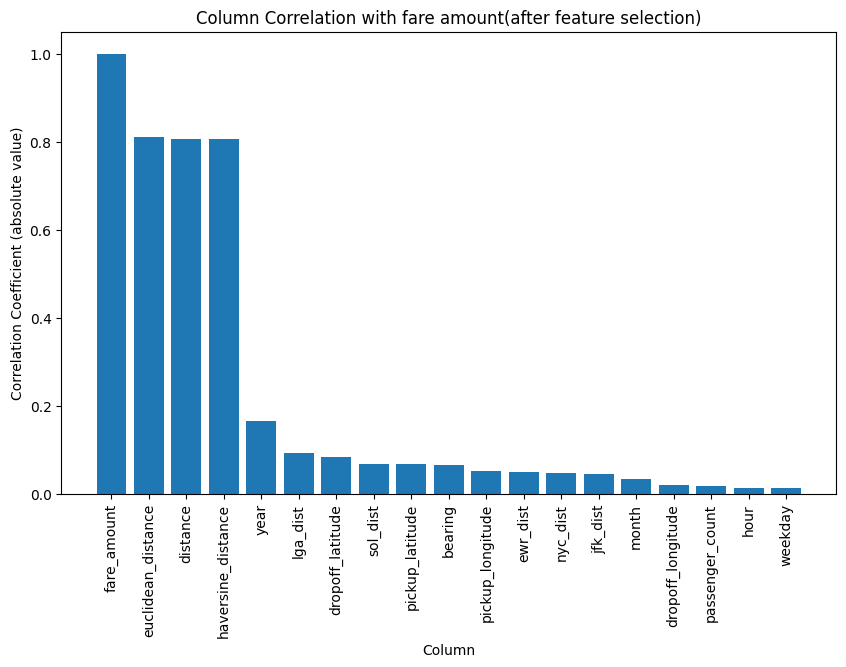

In [55]:
correlations = []
for column in features[:-1]:
    correlation = np.abs(df5[column].corr(df5['fare_amount']))
    correlations.append(correlation)

sorted_features = [x for _, x in sorted(zip(correlations, features[:-1]), reverse=True)]
sorted_correlations = np.sort(correlations)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_correlations)
plt.xlabel('Column')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.title('Column Correlation with fare amount(after feature selection)')
plt.xticks(rotation=90)
plt.show()

In [56]:
df5.shape

(402345, 20)

In [57]:
df5.isnull().sum().sort_values(ascending=False)

fare_amount           0
pickup_longitude      0
euclidean_distance    0
haversine_distance    0
bearing               0
distance              0
nyc_dist              0
sol_dist              0
lga_dist              0
ewr_dist              0
jfk_dist              0
year                  0
weekday               0
month                 0
hour                  0
passenger_count       0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
manhattan_distance    0
dtype: int64

> * **Train Test Split**

In [58]:
from sklearn.model_selection import train_test_split
X = df5.drop(columns=['fare_amount'])
y = df5['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [59]:
# Compute mutual information scores
from sklearn.feature_selection import SelectKBest, mutual_info_regression

mi_selector = SelectKBest(score_func=mutual_info_regression, k='all')
mi_selector.fit(X_train, y_train)

mi_scores = mi_selector.scores_
feature_names= X_train.columns

# Sort the features by their MI scores
sorted_features = sorted(zip(feature_names, mi_scores), key=lambda x: x[1], reverse=True)
print("\nMI Scores:")
for feature, score in sorted_features:
    print(feature, ':', score)


MI Scores:
euclidean_distance : 0.6841028293959877
haversine_distance : 0.668456244313024
distance : 0.668455561082709
manhattan_distance : 0.6009223735877338
year : 0.45422879231830215
bearing : 0.03975990535987606
lga_dist : 0.03354816638946012
dropoff_latitude : 0.03210330421669205
nyc_dist : 0.027528999652197683
sol_dist : 0.02168952648559852
ewr_dist : 0.02150500408214029
pickup_latitude : 0.01981929727763898
dropoff_longitude : 0.017118665117910936
month : 0.015387692779379236
pickup_longitude : 0.01445816906665165
jfk_dist : 0.014437033512109565
hour : 0.01115540147581573
passenger_count : 0.007701526595254471
weekday : 0.0


# Feature Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()

X_scaler.fit(X_train)
X_train = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns)

y_scaler = MinMaxScaler()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [61]:
X_train.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0          0.580011         0.839818           0.368019          0.602919   
1          0.476298         0.272848           0.490730          0.575847   
2          0.457559         0.476611           0.289037          0.353831   
3          0.603645         0.504596           0.730070          0.791720   
4          0.546150         0.742420           0.417603          0.703685   

   passenger_count      hour     month   weekday      year  jfk_dist  \
0              0.0  0.565217  0.000000  1.000000  0.666667  0.912375   
1              0.0  0.869565  0.545455  0.000000  0.833333  0.359089   
2              0.0  0.695652  0.363636  0.666667  1.000000  0.492163   
3              0.8  0.391304  0.000000  0.500000  0.333333  0.525548   
4              0.2  0.695652  0.454545  0.666667  0.333333  0.896366   

   ewr_dist  lga_dist  sol_dist  nyc_dist  distance   bearing  \
0  0.545054  0.451777  0.636351  0.620521  0.443875  0.924954   
1  0.400349  0.524344  0.394049  0.327301  0.528768  0.489609   
2  0.301595  0.608866  0.326509  0.258915  0.280719  0.899050   
3  0.641658  0.291435  0.646902  0.604755  0.549793  0.450396   
4  0.552518  0.428712  0.643986  0.627787  0.122674  0.809642   

   haversine_distance  euclidean_distance  manhattan_distance  
0            0.443875            0.391576            0.402640  
1            0.528768            0.435016            0.348777  
2            0.280719            0.258880            0.271196  
3            0.549793            0.467128            0.453924  
4            0.122674            0.129212            0.119069

# Model Engineering

In [ ]:
## LinearRegression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('linear Mean Square Error = ', metrics.mean_squared_error(y_test, lr_pred))
print("r2 score = ", r2_score(y_test, lr_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

linear Mean Square Error =  0.011481481482905523
r2 score =  0.7183708432016476
Mean Squared Error (MSE): 0.011481481482905523
Root Mean Squared Error (RMSE): 0.10715167512878893


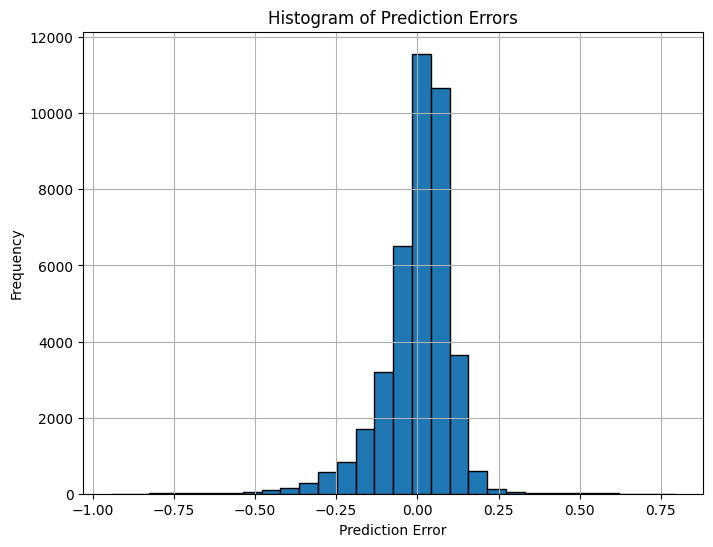

In [64]:
# Calculate prediction errors
errors = lr_pred - y_test

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()

## Lightgbm

In [81]:
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import learning_curve

# Initialize and train the model
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=35, n_estimators=300)
lgb_model.fit(X_train, y_train)

# Predict on train and test sets
y_train_predict = lgb_model.predict(X_train)
y_test_predict = lgb_model.predict(X_test)

# Calculate MSE for train and test sets
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)

print('Train Mean Squared Error (MSE):', mse_train)
print('Test Mean Squared Error (MSE):', mse_test)
print("Test R2 score = ", r2_score(y_test, y_test_predict))
print('Test Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_test_predict)))


plt.show()

# [LightGBM] [Info] Start training from score 0.285022
# Mean Squared Error (MSE): 0.0076346638514557695
# r2 score =  0.8127293985427192
# Root Mean Squared Error (RMSE): 0.0873765635136549

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 362110, number of used features: 19
[LightGBM] [Info] Start training from score 0.285022
Train Mean Squared Error (MSE): 0.007074626757212321
Test Mean Squared Error (MSE): 0.007574788019942955
Test R2 score =  0.8141980922793821
Test Root Mean Squared Error (RMSE): 0.08703325812551749


In [67]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'month', 'weekday',
       'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist',
       'distance', 'bearing', 'haversine_distance', 'euclidean_distance',
       'manhattan_distance'],
      dtype='object')

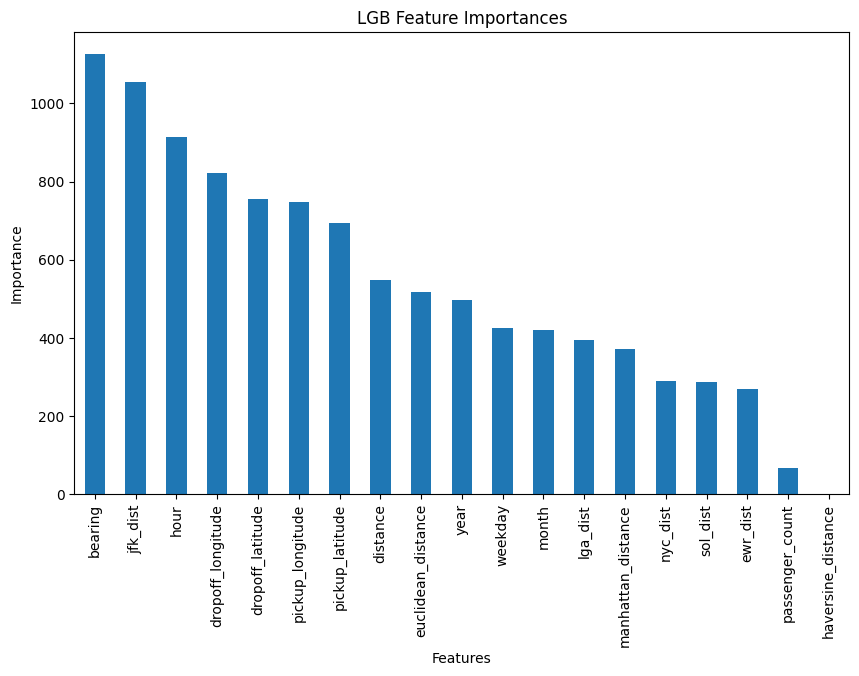

In [68]:
# Create the feature importance Series
feature_imp_random = pd.Series(lgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_imp_random.plot(kind='bar')
plt.title('LGB Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [78]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'num_leaves': randint(20, 50),
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Initialize the LGBMRegressor
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score (negative MSE): {best_score}")

# Train the model with the best parameters
best_lgb_model = lgb.LGBMRegressor(**best_params, objective='regression', random_state=42)
best_lgb_model.fit(X_train, y_train)

# Make predictions
y_LGB_best_predict = best_lgb_model.predict(X_test)

# Evaluate the tuned model
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_LGB_best_predict))
print("r2 score = ", r2_score(y_test, y_LGB_best_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_LGB_best_predict)))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 362110, number of used features: 19
[LightGBM] [Info] Start training from score 0.285022
Best parameters: {'colsample_bytree': 0.6812244898939077, 'learning_rate': 0.1042853570557981, 'n_estimators': 426, 'num_leaves': 46, 'subsample': 0.8779139732158818}
Best cross-validation score (negative MSE): -0.007474191662413343
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3626
[LightGBM] [Info] Number of data points in the train set: 362110, number of used features: 19
[LightGBM] [Info] Start training from score 0.285022
Mean Squared

In [ ]:
# Train Mean Squared Error (MSE): 0.007074626757212321
# Test Mean Squared Error (MSE): 0.007574788019942955
# Test R2 score =  0.8141980922793821
# Test Root Mean Squared Error (RMSE): 0.08703325812551749

In [80]:
# # Plot the learning curve
# train_sizes, train_scores, test_scores = learning_curve(
#     best_lgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# train_scores_mean = -train_scores.mean(axis=1)
# test_scores_mean = -test_scores.mean(axis=1)

# plt.figure(figsize=(12, 6))
# plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training error')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Validation error')

# plt.xlabel('Training examples')
# plt.ylabel('MSE')
# plt.title('Learning Curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
## XGBRegressor

In [69]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)
y_XGB_predict = xgb_model.predict(X_test)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_XGB_predict))
print("r2 score = ", r2_score(y_test, y_XGB_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_XGB_predict)))

# Mean Squared Error (MSE): 0.007874576079849984
# r2 score =  0.8068445936341476
# Root Mean Squared Error (RMSE): 0.08873880819489285

Mean Squared Error (MSE): 0.007795849301351928
r2 score =  0.8087756820811279
Root Mean Squared Error (RMSE): 0.08829410683251701


In [118]:
xgb_model.save_model('xgb_model.model')

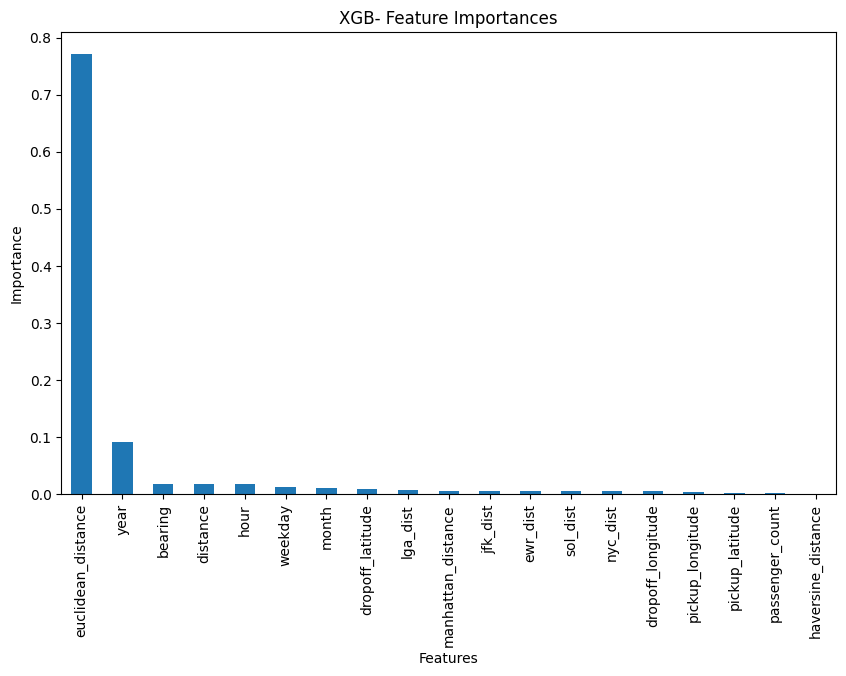

In [71]:
# Create the feature importance Series
feature_imp_random = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_imp_random.plot(kind='bar')
plt.title('XGB- Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Train RMSE: 0.0838820470229069
Test RMSE: 0.08829410683251701


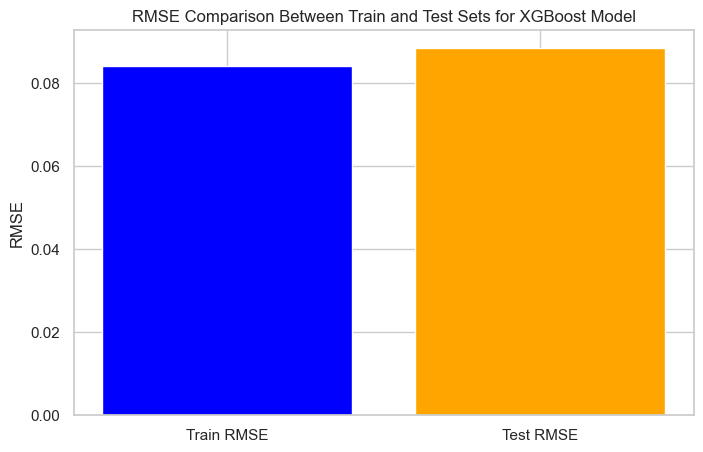

In [73]:
# Assuming you have X_train, y_train, X_test, and y_test
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plotting the RMSE values for the training and test sets
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

labels = ['Train RMSE', 'Test RMSE']
rmse_values = [train_rmse, test_rmse]

plt.bar(labels, rmse_values, color=['blue', 'orange'])
plt.title('RMSE Comparison Between Train and Test Sets for XGBoost Model')
plt.ylabel('RMSE')
plt.show()
# Train RMSE: 0.08460062369591682
# Test RMSE: 0.08873880819489285

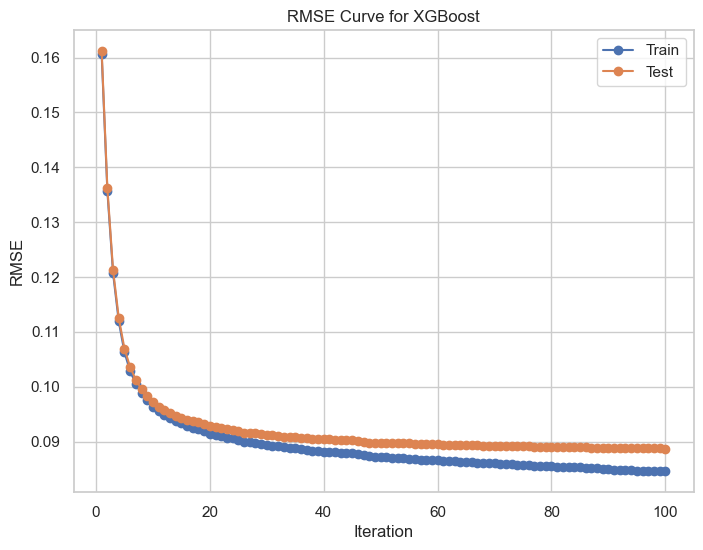

In [125]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Assuming you have X_train, y_train, X_test, y_test
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')

# Training the XGBRegressor model with evaluation set
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# Retrieving the evaluation results
eval_results = xgb_model.evals_result()

# Plotting the RMSE curve for both training and test sets
num_iterations = len(eval_results['validation_0']['rmse'])
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), eval_results['validation_0']['rmse'], marker='o', label='Train')
plt.plot(range(1, num_iterations + 1), eval_results['validation_1']['rmse'], marker='o', label='Test')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Initialize the XGBRegressor
# xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best parameters: {best_params}")
# print(f"Best cross-validation score (negative MSE): {best_score}")

# # Train the model with the best parameters
# best_xgb_model = xgb.XGBRegressor(**best_params, objective="reg:squarederror", random_state=42, tree_method='exact')
# best_xgb_model.fit(X_train, y_train)

# # Make predictions
# y_XGB_best_predict = best_xgb_model.predict(X_test)

# # Evaluate the tuned model
# print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_XGB_best_predict))
# print("r2 score = ", r2_score(y_test, y_XGB_best_predict))
# print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_XGB_best_predict)))
